# Core Strengths of the Dataset for High-Impact Science

1. **Wide Redshift Coverage \\(0 < z < 3.7\\)**  
   The COSMOS-Web dataset enables the study of galaxy evolution across a broad redshift range, encompassing diverse environments and key epochs of cosmic history.

2. **Environmental Context (Group vs. Field, Richness)**  
   The `groups.fits` and `memberships.fits` files provide robust group identifications and membership probabilities. They include essential parameters such as `LAMBDA_STAR` (intrinsic richness), which allows for detailed environmental characterization.

3. **Detailed Non-Parametric Star Formation Histories (SFHs)**  
   The `bayes.sfh.time_binX` and `bayes.sfh.sfr_binX` outputs from CIGALE enable the reconstruction of complete, non-parametric SFHs, offering valuable insights into the temporal evolution of star formation activity.

4. **Comprehensive Morphological Proxies**  
   Parameters such as stellar masses (`mass_med`), Bulge/Disk decompositions (`cat_BD`), and Sersic indices provide complementary diagnostics of galaxy structure and morphological transformation processes.

5. **Brightest Group Galaxies (BGGs)**  
   The `BGGs.txt` catalog offers a dedicated sample of the most massive galaxies within groups, ideal for investigating the evolution and assembly histories of central galaxies in dense environments.

---

# High-Impact Paper Ideas

Several research directions can be pursued using this dataset, each focusing on the relationship between **environment**, **star formation**, and **morphology**.

---

## 1. Environmental Quenching and Morphological Transformation at High Redshift

A classic yet highly relevant topic, this investigation would focus on how environmental conditions influence galaxy quenching and morphological evolution.

### Central Question
How does the group environment affect the quenching of star formation and the transformation of galaxy morphology at high redshift (\\(z > 1\\))? Are these processes correlated, and do they differ between group and field environments?

### Key Analyses

1. **SFH Quenching Timescales**  
   Extract key parameters from the non-parametric SFHs (e.g., formation time, e-folding time, last major burst, and early mass fraction). Compare their distributions for group and field galaxies, controlling for stellar mass and redshift.

2. **Morphology–Star Formation Connection**  
   - Examine the distributions of Sersic indices and Bulge/Disk ratios for star-forming and quenched galaxies (defined via sSFR, derived from SFH and stellar mass) in both group and field environments.  
   - Assess whether quenched group galaxies tend to be more bulge-dominated or exhibit higher Sersic indices compared to field counterparts of similar stellar mass.  
   - Investigate whether star-forming disk galaxies persist longer in the field than in groups.

3. **Evolution with Redshift and Group Richness**  
   Repeat the above analyses across multiple redshift bins (e.g., \\(0.5 < z < 1.0\\), \\(1.0 < z < 1.5\\)) and as a function of `LAMBDA_STAR` (group richness). Evaluate whether environmental effects strengthen in richer groups or at later cosmic times.

4. **“Green Valley” Galaxies**  
   Identify galaxies in the transition phase between star-forming and quiescent states based on sSFR, then analyze their SFHs and morphologies. Determine whether green valley galaxies in groups exhibit faster SFH declines or distinct structural properties relative to those in the field.

### Potential Impact
This analysis would clarify the physical mechanisms—such as ram-pressure stripping, strangulation, or mergers—responsible for halting star formation and reshaping galaxy structure in dense environments at early epochs.

---

## 2. The Assembly History of Bulges and Disks in Group vs. Field Galaxies

Leveraging the Bulge/Disk decompositions, this study can explore how environment influences the relative assembly and growth of galaxy components.

### Central Question
Does the group environment affect the relative growth and assembly timescales of bulges and disks, and how are these linked to overall star formation histories?

### Key Analyses

1. **Bulge/Disk Mass Ratios**  
   Compare the distributions of Bulge-to-Total (B/T) stellar mass ratios for group and field galaxies across stellar mass and redshift bins to determine whether group galaxies tend to be more bulge-dominated.

2. **SFHs of Bulge/Disk-Dominated Galaxies**  
   - Examine whether bulge-dominated systems (high B/T) in groups show earlier or more rapid SFH quenching compared to similar galaxies in the field.  
   - Evaluate whether disk-dominated galaxies in groups display truncated SFHs or suppressed disk growth compared to those in the field.

3. **Sersic Index as a Proxy for Structural Growth**  
   Correlate the Sersic index with B/T ratio and SFH parameters to test whether a higher Sersic index (greater central concentration) corresponds to earlier quenching, particularly in group environments.

4. **BGG Component Growth**  
   Focus on the B/T ratios and SFHs of Brightest Group Galaxies (BGGs). Assess whether BGGs are predominantly bulge-dominated systems with early stellar mass assembly, and compare their SFHs with those of other group members and field galaxies of similar mass.

### Potential Impact
This analysis would provide direct evidence of how environmental processes accelerate bulge formation and modify disk growth, offering clues about the role of mergers and instabilities in galaxy structural evolution.

---

## 3. The Fate of Satellite Galaxies in High-Redshift Groups

Using `memberships.fits` and `BGGs.txt`, this study would focus on distinguishing between BGGs, satellites, and field galaxies to investigate environmental influences on galaxy evolution.

### Central Question
What are the distinct evolutionary pathways, in terms of SFH and morphology, followed by satellite galaxies compared to BGGs and field galaxies in high-redshift groups? How does the probability of group membership (`ASSOC_PROB`) correlate with their observed properties?

### Key Analyses

1. **BGG vs. Satellite vs. Field Comparison**  
   Compare SFHs, stellar masses, Sersic indices, and B/T ratios across these three populations, controlling for stellar mass and redshift. Quantify differences in the fraction of quenched galaxies and the prevalence of bulge-dominated morphologies.

2. **Environmental Influence Gradient**  
   Use `ASSOC_PROB` as a proxy for the degree of group association. Investigate whether galaxies with higher `ASSOC_PROB` values—likely more central or dynamically evolved—exhibit truncated SFHs, lower sSFRs, or higher Sersic indices than less associated systems.

3. **Inferred Infall Timescales**  
   Estimate approximate infall times from SFH features (e.g., recent declines in SFR) and correlate these with group membership and `ASSOC_PROB`. Although challenging, such an analysis could yield valuable constraints on environmental timescales.

### Potential Impact
This study would shed light on the efficiency and timescales of environmental processes—such as ram-pressure stripping and tidal interactions—affecting satellite galaxies at high redshift, distinguishing their evolution from that of central and isolated galaxies.

---

# Guidelines for High-Impact Analysis

- **Quantitative Assessment:**  
  Apply statistical tests (e.g., Kolmogorov–Smirnov for distribution differences, t-tests for mean comparisons) to evaluate the significance of observed trends.  

- **Evolutionary Emphasis:**  
  Highlight redshift evolution wherever possible, leveraging the wide temporal coverage of COSMOS-Web.  

- **Physical Contextualization:**  
  Relate observational findings to theoretical frameworks, such as ΛCDM cosmology and semi-analytic models of galaxy formation.  

- **Transparency on Limitations:**  
  Acknowledge potential uncertainties in SFH reconstruction, group membership assignments, and morphological decompositions at high redshift.  




In [1]:
from astropy.table import Table, join
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde


warnings.simplefilter("ignore", UserWarning)

plt.style.use('/home/arango/arango/bin/matplotlibrc.txt')


groups=Table.read('./groups.fits')
groups=groups.to_pandas()
display(groups)


#Cuts for SN, LAMBDA_STAR, etc...
groups = groups[
    (groups['SN_NOCL'] >= 10) &
    (groups['LAMBDA_STAR'] > 10.55) &
    (groups['MSKFRC'] < 0.2)
]

display(groups)

member=Table.read('./memberships.fits')
member=member.to_pandas()
display(member)

member = member[member['ID'].isin(groups['ID'])]
display(member)

ID         RA       DEC     Z        SN    SN_NOCL       AMP  \
0        1  149.91863  2.517218  0.71  6.653829  43.107595  2.514243   
1        2  149.91862  2.602218  0.24  4.712954  40.495643  1.986793   
2        3  150.00373  2.312227  3.68  4.567143  33.195164  0.701136   
3        4  150.05876  2.597230  0.68  5.439390  30.832903  1.734799   
4        5  150.29390  1.752220  3.61  4.937563  30.487282  0.676448   
...    ...        ...       ...   ...       ...        ...       ...   
1673  1812  149.69357  1.982171  0.33  2.383263   6.009715  0.455170   
1674  1813  150.48916  2.462184  2.51  2.252740   6.009676  0.159626   
1675  1814  150.34895  1.947213  2.49  2.409756   6.008331  0.150816   
1676  1815  150.32393  1.862216  2.65  2.186377   6.005380  0.130419   
1677  1816  150.19389  2.462229  1.21  2.486702   6.002642  0.309013   

        MSKFRC      LAMBDA  LAMBDA_STAR  DETECTION_FLAG  N_SPEC  ZPHYS_SIGM  \
0     0.104301  455.954220    77.568153              16     103    0.004149   
1     0.241867  183.466210    18.503649               2      35    0.008678   
2     0.069258  145.831450     8.640436               1     -99    0.115752   
3     0.102906  232.250370    42.051607              18      55    0.007892   
4     0.359746  224.586110    22.821807              11     -99    0.086485   
...        ...         ...          ...             ...     ...         ...   
1673  0.313693   27.761628     3.701695              78       4    0.023626   
1674  0.198056   34.762683     4.595217              83     -99    0.056113   
1675  0.056402   29.256356     6.651656               0       2    0.074435   
1676  0.072944   23.866291     3.112159              96       1    0.094066   
1677  0.107917   30.124744     4.458346              64       2    0.031121   

      ZPHYS_SIGP  
0       0.002031  
1       0.001687  
2       0.081169  
3       0.003001  
4       0.052277  
...          ...  
1673    0.004865  
1674    0.052017  
1675    0.057948  
1676    0.075546  
1677    0.025245  

[1678 rows x 14 columns]

ID         RA       DEC     Z        SN    SN_NOCL       AMP    MSKFRC  \
0      1  149.91863  2.517218  0.71  6.653829  43.107595  2.514243  0.104301   
3      4  150.05876  2.597230  0.68  5.439390  30.832903  1.734799  0.102906   
5      7  149.99370  2.587226  1.56  5.634476  29.477466  1.252041  0.130224   
6      8  149.83861  2.222205  3.61  5.042265  29.281560  0.553257  0.077489   
9     11  150.31398  2.277218  2.62  4.725679  27.639526  0.599820  0.059346   
..   ...        ...       ...   ...       ...        ...       ...       ...   
657  697  150.07879  2.357231  1.53  3.185406  10.233069  0.411035  0.168668   
664  704  149.97371  2.257224  0.88  3.469449  10.180927  0.645727  0.114927   
666  707  150.17885  1.882230  1.17  3.372676  10.160424  0.526913  0.050668   
672  713  150.05376  2.567230  0.88  3.465112  10.120742  0.652134  0.124617   
673  714  150.31400  2.412218  1.62  3.660384  10.120318  0.481564  0.175187   

         LAMBDA  LAMBDA_STAR  DETECTION_FLAG  N_SPEC  ZPHYS_SIGM  ZPHYS_SIGP  
0    455.954220    77.568153              16     103    0.004149    0.002031  
3    232.250370    42.051607              18      55    0.007892    0.003001  
5    181.113230    24.754781              16       3    0.014536    0.012214  
6    134.082740    14.488008               1     -99    0.109403    0.069565  
9    174.348270    19.408537               0       5    0.036739    0.031463  
..          ...          ...             ...     ...         ...         ...  
657   54.089860    13.678624               4       2    0.027587    0.022207  
664   65.091499    14.425822               0       6    0.014532    0.003911  
666   57.726045    10.954101              16       3    0.019489    0.010858  
672   67.426500    14.129742               0       4    0.016443    0.003514  
673   68.308203    12.423008              20       1    0.024253    0.021726  

[214 rows x 14 columns]

GALID  FIELD_PROB    ID  ASSOC_PROB
0             0    0.987482  1240    0.007182
1             0    0.987482   736    0.005336
2             1    0.807802   655    0.158553
3             1    0.807802   279    0.033645
4             2    0.667850  1039    0.159138
...         ...         ...   ...         ...
1745647  783972    0.940367  1441    0.007496
1745648  783999    0.889689   798    0.078152
1745649  783999    0.889689  1347    0.020261
1745650  783999    0.889689   864    0.006654
1745651  783999    0.889689  1644    0.005245

[1745652 rows x 4 columns]

GALID  FIELD_PROB   ID  ASSOC_PROB
3             1    0.807802  279    0.033645
9             2    0.667850  322    0.013704
11            2    0.667850  267    0.010808
14            2    0.667850   43    0.005776
19            4    0.852678  279    0.023901
...         ...         ...  ...         ...
1745279  780379    0.904128  238    0.006079
1745286  780380    0.797592  238    0.006300
1745326  780402    0.899272  238    0.007693
1745342  780417    0.891166  238    0.006787
1745357  780422    0.911000  238    0.007750

[355236 rows x 4 columns]

In [2]:
#C_noon=Table.read('/home/arango/arango/CIGALE/runs/run_web/gms-article-2024_2.0/run_observations/out/results.fits')
#C_noon=pd.read_csv('/home/arango/arango/CIGALE/runs/run_web/JAN24_V3.1.0/Full_no-miss-ids/CIGALE_COSMOSWEB_v3.1.0.dat',sep=' ')
#C_noon
    

In [3]:
from astropy.io import ascii, fits


with fits.open('/n17data/shuntov/COSMOS-Web/Catalogs_Release_v1/COSMOSWeb_megamaster_v3.1.0.fits') as hdu:
    hdu.info()
    hdr = hdu[1].header
    cat_photom = Table(hdu[1].data)
    cat_lephare = Table(hdu[2].data)
    cat_cigale = Table(hdu[4].data)
    cat_BD = Table(hdu[6].data)


condition_clean = condition_clean = (cat_lephare['type']==0) & (cat_photom['warn_flag']==0) & (np.abs(cat_photom['mag_model_f444w'])<30) & (cat_photom['flag_star_hsc']==0)

cat_cigale['id']=cat_photom['id']
cat_lephare['id']=cat_photom['id']
cat_BD['id']=cat_photom['id']

cat_photom=cat_photom[condition_clean]
cat_BD=cat_BD[condition_clean].to_pandas()
cat_lephare=cat_lephare[condition_clean].to_pandas()
cat_cigale=cat_cigale[condition_clean].to_pandas()


current_columns=cat_cigale.columns.tolist()
new_column_name='id'
current_columns.remove(new_column_name)
new_column_order = [new_column_name] + current_columns
cat_cigale=cat_cigale[new_column_order]


current_columns=cat_lephare.columns.tolist()
new_column_name='id'
current_columns.remove(new_column_name)
new_column_order = [new_column_name] + current_columns
cat_lephare=cat_lephare[new_column_order]


current_columns=cat_BD.columns.tolist()
new_column_name='id'
current_columns.remove(new_column_name)
new_column_order = [new_column_name] + current_columns
cat_BD=cat_BD[new_column_order]



display(cat_cigale)
display(cat_lephare)
display(cat_BD)

Filename: /n17data/shuntov/COSMOS-Web/Catalogs_Release_v1/COSMOSWeb_megamaster_v3.1.0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  PHOTOMETRY HOTCOLD AND SE++    1 BinTableHDU    603   784016R x 287C   [K, K, 3A, K, D, D, D, D, D, D, D, D, D, 4A, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L, L, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

id     age_form  age_form_err  sfr_mass_vector_dir  \
0            0  4649.568616   2291.212484           -10.967051   
1            1    47.986503     57.242320            70.375336   
2            2   940.044667    716.324497           -10.532494   
3            3   112.018580    160.546277            77.005233   
4            4  2142.092086    976.580078           -87.181445   
...        ...          ...           ...                  ...   
576048  783960   462.096831    263.892273            -7.422851   
576049  783969  3321.359531   1487.526711            -1.642844   
576050  783972  5549.245174   2397.403722             5.866624   
576051  783991   766.213399    469.504779           -10.404502   
576052  783999  2631.167165   1724.807655             1.209933   

        sfr_mass_vector_dir_err  sfh_sfr_bin1  sfh_sfr_bin1_err  sfh_sfr_bin2  \
0                     85.526695  8.606240e-11      6.374197e-11  1.057550e-10   
1                      0.262034  4.830557e-09      4.329586e-11  1.278269e-08   
2                     78.176292  5.600413e-09      1.019199e-08  2.675457e-09   
3                      3.445722  2.265577e-08      2.915635e-09  1.807230e-08   
4                     20.705366  1.182398e-11      1.402169e-11  1.592234e-11   
...                         ...           ...               ...           ...   
576048                61.681570  1.406459e-09      5.309616e-09  1.115818e-09   
576049                85.126220  4.562611e-10      1.711422e-09  4.063840e-10   
576050                85.869153  1.303562e-10      2.357902e-10  1.902126e-10   
576051                72.753685  2.863139e-09      8.418122e-09  1.465851e-09   
576052                82.257686  1.866082e-09      4.224151e-09  1.267821e-09   

        sfh_sfr_bin2_err  sfh_sfr_bin3  ...  sfh_integrated  \
0           1.182862e-10  1.189248e-10  ...    1.582955e+07   
1           1.583583e-10  1.180059e-08  ...    1.712760e+09   
2           5.260037e-09  1.295259e-09  ...    3.162887e+08   
3           5.486981e-09  7.625422e-09  ...    2.414103e+09   
4           1.661822e-11  2.017622e-11  ...    4.735963e+09   
...                  ...           ...  ...             ...   
576048      2.613037e-09  1.061688e-09  ...    6.888956e+08   
576049      1.455328e-09  3.250819e-10  ...    1.455349e+08   
576050      6.534354e-10  1.748795e-10  ...    1.214832e+06   
576051      3.989265e-09  8.948770e-10  ...    6.079108e+08   
576052      2.836263e-09  7.999164e-10  ...    4.721153e+07   

        sfh_integrated_err   sfr_inst  sfr_inst_err  sfr_100myr  \
0             5.551806e+06   0.001244      0.000818    0.001564   
1             8.563800e+07   8.271580      0.413579   11.212744   
2             1.481867e+08   0.666498      0.949129    0.254361   
3             4.447503e+08  53.448293      2.672415   14.877904   
4             1.071761e+09   0.054457      0.060887    0.137108   
...                    ...        ...           ...         ...   
576048        2.026045e+08   0.646258      1.349408    0.828699   
576049        5.365833e+07   0.026382      0.050900    0.021549   
576050        4.767335e+05   0.000114      0.000110    0.000119   
576051        2.094079e+08   0.686817      1.355951    0.437713   
576052        2.482816e+07   0.028355      0.041382    0.016051   

        sfr_100myr_err          mass      mass_err  chi2_best_fit  \
0             0.001094  8.626358e+06  2.696179e+06      96.646183   
1             0.560637  1.262833e+09  6.314163e+07     228.593322   
2             0.194727  1.963515e+08  8.075525e+07       7.801025   
3             1.776854  1.833159e+09  2.531977e+08     122.106324   
4             0.103338  2.719110e+09  5.343669e+08      17.367667   
...                ...           ...           ...            ...   
576048        0.489036  4.531634e+08  1.175137e+08     161.585219   
576049        0.031044  8.105821e+07  2.709008e+07      50.806117   
576050        0.000112  6.561745e+05  2.377580e+05      37.0789

id  zfinal  type  zpdf_med  zpdf_l68  zpdf_u68   zchi2  chi2_best  \
0            0  0.1671     0    0.1671    0.1227    0.5723  0.0957   23.57530   
1            1  0.9261     0    0.9261    0.9200    0.9556  0.9251  167.39800   
2            2  1.8650     0    1.8650    1.1608    2.1799  1.8870   14.30790   
3            3  1.6833     0    1.6833    1.6612    1.6900  1.6860   56.33740   
4            4  0.9253     0    0.9253    0.8080    1.0065  0.9856    2.73200   
...        ...     ...   ...       ...       ...       ...     ...        ...   
576048  783960  4.4136     0    4.4136    1.0019    4.9618  4.8610   25.91470   
576049  783969  0.6948     0    0.6948    0.4193    0.8706  0.8354   34.85670   
576050  783972  0.0940     0    0.0940    0.0298    2.2793  2.3100   26.18470   
576051  783991  2.8286     0    2.8286    0.6977    4.8446  4.8570   19.63060   
576052  783999  0.6251     0    0.6251    0.2253    1.1996  0.7287    8.94104   

        nbfilt  zp_agn  ...    l_r    l_k  mabs_nuv    mabs_r    mabs_j  \
0           32  0.2876  ...  6.179  5.495  -8.81732 -12.01759 -13.21911   
1           32  0.6735  ...  9.382  8.524 -18.56224 -20.04946 -21.12883   
2           32  0.6063  ...  8.152  7.111 -16.38266 -17.70433 -17.73541   
3           31  2.2474  ...  9.739  8.815 -19.98842 -20.90562 -21.81576   
4           31  0.3876  ...  8.920  8.111 -16.71218 -19.51574 -20.08685   
...        ...     ...  ...    ...    ...       ...       ...       ...   
576048      31  4.8450  ...  8.611  7.716 -18.28960 -18.87199 -19.14437   
576049      31  0.3981  ...  7.283  6.530 -13.89836 -15.81823 -16.19906   
576050      31  0.0000  ...  5.115  4.257  -8.81722 -10.20773 -11.15366   
576051      31  2.7634  ...  8.444  7.311 -17.60884 -18.46763 -18.24678   
576052      31  0.2086  ...  7.026  6.170 -12.26416 -14.60195 -15.12411   

          mabs_k  flag_chandra  zpdf_med_space  zpdf_l68_space  zpdf_u68_space  
0      -13.11101           0.0          0.0886          0.0423          0.1546  
1      -20.80142           0.0          1.0139          1.0024          1.0256  
2      -17.42897           0.0          0.8892          0.4675          1.6909  
3      -21.76859           0.0          1.7587          1.6497          2.0741  
4      -19.47745           0.0          0.8546          0.4805          1.9336  
...          ...           ...             ...             ...             ...  
576048 -18.63230           0.0          3.8582          2.9998          4.7293  
576049 -15.47801           0.0          0.6529          0.4236          0.9131  
576050 -10.02849           0.0          0.0520          0.0174          0.1385  
576051 -18.16219           0.0          0.9551          0.6368          3.5919  
576052 -14.83987           0.0          0.7827          0.3382          2.2172  

[576053 rows x 44 columns]

id  ra_detec_bd  dec_detec_bd  disk_radius_deg  \
0            0   149.857546      2.093537         0.000052   
1            1   149.861467      2.094084         0.000162   
2            2   149.816507      2.111222         0.000026   
3            3   149.753344      2.138271         0.000135   
4            4   149.804179      2.121018         0.000243   
...        ...          ...           ...              ...   
576048  783960   150.495394      2.279912         0.000016   
576049  783969   150.494118      2.280804         0.000028   
576050  783972   150.499004      2.279145         0.000014   
576051  783991   150.499839      2.279473         0.000054   
576052  783999   150.497096      2.280676         0.000031   

        disk_radius_deg_err  bulge_radius_deg  bulge_radius_deg_err  \
0              4.562912e-06          0.000013              0.000027   
1              6.832758e-07          0.000173                   NaN   
2              8.282931e-06          0.000065              0.000015   
3              2.775890e-06          0.000171              0.000011   
4              7.832915e-06          0.000034              0.000054   
...                     ...               ...                   ...   
576048         3.873254e-06          0.000001              0.000002   
576049         1.084537e-05          0.000001              0.000003   
576050         3.781356e-06          0.000001              0.000002   
576051         8.975974e-06          0.000006              0.000011   
576052         8.346150e-06          0.000004              0.000011   

         angle_bd  angle_bd_err  disk_axratio  ...  b/t_err_sc-ia679  \
0       62.849441      3.060701      0.365221  ...          0.186658   
1      -79.053488      0.051035      0.103406  ...          0.000000   
2      -18.406656     10.518526      0.534959  ...          0.155945   
3       46.355832      0.319239      0.334507  ...          0.000000   
4       -9.378147      0.697578      0.343412  ...          0.000000   
...           ...           ...           ...  ...               ...   
576048  75.231436     12.612866      0.322775  ...          0.107482   
576049  46.473731     10.835749      0.284960  ...          0.674629   
576050  64.146772     15.676089      0.546330  ...          0.120400   
576051 -88.364608     11.365718      0.570664  ...          0.219714   
576052  29.169811     21.457120      0.610312  ...          0.137146   

        b/t_err_sc-ia738  b/t_err_sc-ia767  b/t_err_sc-ib427  \
0               0.256699          0.227271          0.127101   
1               0.000000          0.000000          0.000000   
2               0.171690          0.180752          0.079756   
3               0.000000          0.000000          0.000000   
4               0.000000          0.000000          0.000000   
...                  ...               ...               ...   
576048          0.116541          0.120287          0.069700   
576049          0.797472          0.701492          0.428394   
576050          0.133268          0.137538          0.080959   
576051          0.248219          0.211736          0.138770   
576052          0.142370          0.151515          0.085945   

        b/t_err_sc-ib505  b/t_err_sc-ib574  b/t_err_sc-ib709  \
0               0.143595          0.166960          0.201649   
1               0.000000          0.000000          0.000000   
2               0.151811          0.133466          0.161779   
3               0.000000          0.000000          0.000000   
4               0.000000          0.000000          0.000000   
...                  ...               ...               ...   
576048          0.082540          0.093084          0.112995   
576049          0.508197          0.512917          0.673394   
576050          0.093933          0.105701          0.125371   
576051          0.166006          0.190224          0.225668   
576052          0.102709          0.114580          0.138019   

        b/t

In [4]:
cigale_matched = cat_cigale.merge(member, left_on='id', right_on='GALID', how='left')
lephare_matched = cat_lephare.merge(member, left_on='id', right_on='GALID', how='left')
BD_matched = cat_BD.merge(member, left_on='id', right_on='GALID', how='left')

display(cigale_matched)
display(lephare_matched)
display(BD_matched)

id     age_form  age_form_err  sfr_mass_vector_dir  \
0            0  4649.568616   2291.212484           -10.967051   
1            1    47.986503     57.242320            70.375336   
2            2   940.044667    716.324497           -10.532494   
3            2   940.044667    716.324497           -10.532494   
4            2   940.044667    716.324497           -10.532494   
...        ...          ...           ...                  ...   
721168  783960   462.096831    263.892273            -7.422851   
721169  783969  3321.359531   1487.526711            -1.642844   
721170  783972  5549.245174   2397.403722             5.866624   
721171  783991   766.213399    469.504779           -10.404502   
721172  783999  2631.167165   1724.807655             1.209933   

        sfr_mass_vector_dir_err  sfh_sfr_bin1  sfh_sfr_bin1_err  sfh_sfr_bin2  \
0                     85.526695  8.606240e-11      6.374197e-11  1.057550e-10   
1                      0.262034  4.830557e-09      4.329586e-11  1.278269e-08   
2                     78.176292  5.600413e-09      1.019199e-08  2.675457e-09   
3                     78.176292  5.600413e-09      1.019199e-08  2.675457e-09   
4                     78.176292  5.600413e-09      1.019199e-08  2.675457e-09   
...                         ...           ...               ...           ...   
721168                61.681570  1.406459e-09      5.309616e-09  1.115818e-09   
721169                85.126220  4.562611e-10      1.711422e-09  4.063840e-10   
721170                85.869153  1.303562e-10      2.357902e-10  1.902126e-10   
721171                72.753685  2.863139e-09      8.418122e-09  1.465851e-09   
721172                82.257686  1.866082e-09      4.224151e-09  1.267821e-09   

        sfh_sfr_bin2_err  sfh_sfr_bin3  ...  sfr_100myr  sfr_100myr_err  \
0           1.182862e-10  1.189248e-10  ...    0.001564        0.001094   
1           1.583583e-10  1.180059e-08  ...   11.212744        0.560637   
2           5.260037e-09  1.295259e-09  ...    0.254361        0.194727   
3           5.260037e-09  1.295259e-09  ...    0.254361        0.194727   
4           5.260037e-09  1.295259e-09  ...    0.254361        0.194727   
...                  ...           ...  ...         ...             ...   
721168      2.613037e-09  1.061688e-09  ...    0.828699        0.489036   
721169      1.455328e-09  3.250819e-10  ...    0.021549        0.031044   
721170      6.534354e-10  1.748795e-10  ...    0.000119        0.000112   
721171      3.989265e-09  8.948770e-10  ...    0.437713        0.292676   
721172      2.836263e-09  7.999164e-10  ...    0.016051        0.018014   

                mass      mass_err  chi2_best_fit  chi2_red_best_fit  GALID  \
0       8.626358e+06  2.696179e+06      96.646183           4.602199    NaN   
1       1.262833e+09  6.314163e+07     228.593322           8.466419    1.0   
2       1.963515e+08  8.075525e+07       7.801025           0.487564    2.0   
3       1.963515e+08  8.075525e+07       7.801025           0.487564    2.0   
4       1.963515e+08  8.075525e+07       7.801025           0.487564    2.0   
...              ...           ...            ...                ...    ...   
721168  4.531634e+08  1.175137e+08     161.585219          10.772348    NaN   
721169  8.105821e+07  2.709008e+07      50.806117           2.988595    NaN   
721170  6.561745e+05  2.377580e+05      37.078912           2.181112    NaN   
721171  3.824106e+08  1.159591e+08      29.603487           1.558078    NaN   
721172  2.681721e+07  1.268827e+07      75.005659           4.412098    NaN   

        FIELD_PROB     ID  ASSOC_PROB  
0              NaN    NaN         NaN  
1         0.807802  279.0    0.033645  
2         0.667850  322.0    0.013704  
3         0.667850  267.0    0.010808  
4         0.667850   43.0    0.005776  
...            ...    ...         ...  
721168         NaN    NaN         NaN  
721169         NaN    NaN         NaN  
721170         NaN    NaN         Na

id  zfinal  type  zpdf_med  zpdf_l68  zpdf_u68   zchi2  chi2_best  \
0            0  0.1671     0    0.1671    0.1227    0.5723  0.0957   23.57530   
1            1  0.9261     0    0.9261    0.9200    0.9556  0.9251  167.39800   
2            2  1.8650     0    1.8650    1.1608    2.1799  1.8870   14.30790   
3            2  1.8650     0    1.8650    1.1608    2.1799  1.8870   14.30790   
4            2  1.8650     0    1.8650    1.1608    2.1799  1.8870   14.30790   
...        ...     ...   ...       ...       ...       ...     ...        ...   
721168  783960  4.4136     0    4.4136    1.0019    4.9618  4.8610   25.91470   
721169  783969  0.6948     0    0.6948    0.4193    0.8706  0.8354   34.85670   
721170  783972  0.0940     0    0.0940    0.0298    2.2793  2.3100   26.18470   
721171  783991  2.8286     0    2.8286    0.6977    4.8446  4.8570   19.63060   
721172  783999  0.6251     0    0.6251    0.2253    1.1996  0.7287    8.94104   

        nbfilt  zp_agn  ...    mabs_j    mabs_k  flag_chandra  zpdf_med_space  \
0           32  0.2876  ... -13.21911 -13.11101           0.0          0.0886   
1           32  0.6735  ... -21.12883 -20.80142           0.0          1.0139   
2           32  0.6063  ... -17.73541 -17.42897           0.0          0.8892   
3           32  0.6063  ... -17.73541 -17.42897           0.0          0.8892   
4           32  0.6063  ... -17.73541 -17.42897           0.0          0.8892   
...        ...     ...  ...       ...       ...           ...             ...   
721168      31  4.8450  ... -19.14437 -18.63230           0.0          3.8582   
721169      31  0.3981  ... -16.19906 -15.47801           0.0          0.6529   
721170      31  0.0000  ... -11.15366 -10.02849           0.0          0.0520   
721171      31  2.7634  ... -18.24678 -18.16219           0.0          0.9551   
721172      31  0.2086  ... -15.12411 -14.83987           0.0          0.7827   

        zpdf_l68_space  zpdf_u68_space  GALID  FIELD_PROB     ID  ASSOC_PROB  
0               0.0423          0.1546    NaN         NaN    NaN         NaN  
1               1.0024          1.0256    1.0    0.807802  279.0    0.033645  
2               0.4675          1.6909    2.0    0.667850  322.0    0.013704  
3               0.4675          1.6909    2.0    0.667850  267.0    0.010808  
4               0.4675          1.6909    2.0    0.667850   43.0    0.005776  
...                ...             ...    ...         ...    ...         ...  
721168          2.9998          4.7293    NaN         NaN    NaN         NaN  
721169          0.4236          0.9131    NaN         NaN    NaN         NaN  
721170          0.0174          0.1385    NaN         NaN    NaN         NaN  
721171          0.6368          3.5919    NaN         NaN    NaN         NaN  
721172          0.3382          2.2172    NaN         NaN    NaN         NaN  

[721173 rows x 48 columns]

id  ra_detec_bd  dec_detec_bd  disk_radius_deg  \
0            0   149.857546      2.093537         0.000052   
1            1   149.861467      2.094084         0.000162   
2            2   149.816507      2.111222         0.000026   
3            2   149.816507      2.111222         0.000026   
4            2   149.816507      2.111222         0.000026   
...        ...          ...           ...              ...   
721168  783960   150.495394      2.279912         0.000016   
721169  783969   150.494118      2.280804         0.000028   
721170  783972   150.499004      2.279145         0.000014   
721171  783991   150.499839      2.279473         0.000054   
721172  783999   150.497096      2.280676         0.000031   

        disk_radius_deg_err  bulge_radius_deg  bulge_radius_deg_err  \
0              4.562912e-06          0.000013              0.000027   
1              6.832758e-07          0.000173                   NaN   
2              8.282931e-06          0.000065              0.000015   
3              8.282931e-06          0.000065              0.000015   
4              8.282931e-06          0.000065              0.000015   
...                     ...               ...                   ...   
721168         3.873254e-06          0.000001              0.000002   
721169         1.084537e-05          0.000001              0.000003   
721170         3.781356e-06          0.000001              0.000002   
721171         8.975974e-06          0.000006              0.000011   
721172         8.346150e-06          0.000004              0.000011   

         angle_bd  angle_bd_err  disk_axratio  ...  b/t_err_sc-ib505  \
0       62.849441      3.060701      0.365221  ...          0.143595   
1      -79.053488      0.051035      0.103406  ...          0.000000   
2      -18.406656     10.518526      0.534959  ...          0.151811   
3      -18.406656     10.518526      0.534959  ...          0.151811   
4      -18.406656     10.518526      0.534959  ...          0.151811   
...           ...           ...           ...  ...               ...   
721168  75.231436     12.612866      0.322775  ...          0.082540   
721169  46.473731     10.835749      0.284960  ...          0.508197   
721170  64.146772     15.676089      0.546330  ...          0.093933   
721171 -88.364608     11.365718      0.570664  ...          0.166006   
721172  29.169811     21.457120      0.610312  ...          0.102709   

        b/t_err_sc-ib574  b/t_err_sc-ib709  b/t_err_sc-ib827  \
0               0.166960          0.201649          0.233484   
1               0.000000          0.000000          0.000000   
2               0.133466          0.161779          0.193361   
3               0.133466          0.161779          0.193361   
4               0.133466          0.161779          0.193361   
...                  ...               ...               ...   
721168          0.093084          0.112995          0.129366   
721169          0.512917          0.673394          0.897247   
721170          0.105701          0.125371          0.153635   
721171          0.190224          0.225668          0.258313   
721172          0.114580          0.138019          0.161536   

        b/t_err_sc-nb711  b/t_err_sc-nb816  GALID  FIELD_PROB     ID  \
0               0.195802          0.229970    NaN         NaN    NaN   
1               0.000000          0.000000    1.0    0.807802  279.0   
2               0.183375          0.183873    2.0    0.667850  322.0   
3               0.183375          0.183873    2.0    0.667850  267.0   
4               0.183375          0.183873    2.0    0.667850   43.0   
...                  ...               ...    ...         ...    ...   
721168          0.109315          0.127225    NaN         NaN    NaN   
721169          0.721524          0.828120    NaN         NaN    NaN   
721170          0.120868          0.143920    NaN         NaN    NaN   
721171          0.059441          0.238894    NaN         Na

In [5]:
# Filter rows where FIELD_PROB > 0.5
filtered_cigale_field = cigale_matched[cigale_matched['FIELD_PROB'] > 0.8]
display(filtered_cigale_field.sort_values(by='id')['id'])

filtered_lephare_field = lephare_matched[lephare_matched['FIELD_PROB'] > 0.8]
display(filtered_lephare_field.sort_values(by='id')['id'])

filtered_BD_field = BD_matched[BD_matched['FIELD_PROB'] > 0.8]
display(filtered_BD_field.sort_values(by='id')['id'])

# For multiple rows with the same 'id', select the one with the maximum 'ASSOC_PROB'
# idxmax() returns the index of the first occurrence of the maximum value within each group

idx = filtered_cigale_field.groupby('id')['ASSOC_PROB'].idxmin()
cigale_field_gal = filtered_cigale_field.loc[idx]
display(cigale_field_gal.sort_values(by='id')['id'])

idx = filtered_lephare_field.groupby('id')['ASSOC_PROB'].idxmin()
lephare_field_gal = filtered_lephare_field.loc[idx]
display(lephare_field_gal.sort_values(by='id')['id'])

idx = filtered_BD_field.groupby('id')['ASSOC_PROB'].idxmin()
BD_field_gal = filtered_BD_field.loc[idx]
display(BD_field_gal.sort_values(by='id')['id'])


# Filter rows where ASSOC_PROB > 0.8
filtered_cigale_group = cigale_matched[cigale_matched['ASSOC_PROB'] > 0.5]
display(filtered_cigale_group.sort_values(by='id')['id'])

filtered_lephare_group = lephare_matched[lephare_matched['ASSOC_PROB'] > 0.5]
display(filtered_lephare_group.sort_values(by='id')['id'])

filtered_BD_group = BD_matched[BD_matched['ASSOC_PROB'] > 0.5]
display(filtered_BD_group.sort_values(by='id')['id'])

# For multiple rows with the same 'id', select the one with the maximum 'ASSOC_PROB'
# idxmax() returns the index of the first occurrence of the maximum value within each group

idx = filtered_cigale_group.groupby('id')['ASSOC_PROB'].idxmax()
cigale_group_gal = filtered_cigale_group.loc[idx]
#group_gal = filtered_df_group
display(cigale_group_gal.sort_values(by='id')['id'])

idx = filtered_lephare_group.groupby('id')['ASSOC_PROB'].idxmax()
lephare_group_gal = filtered_lephare_group.loc[idx]
#group_gal = filtered_df_group
display(lephare_group_gal.sort_values(by='id')['id'])

idx = filtered_BD_group.groupby('id')['ASSOC_PROB'].idxmax()
BD_group_gal = filtered_BD_group.loc[idx]
#group_gal = filtered_df_group
display(BD_group_gal.sort_values(by='id')['id'])


1              1
6              4
22            13
23            14
34            20
           ...  
720148    780339
720178    780379
720199    780402
720210    780417
720215    780422
Name: id, Length: 177812, dtype: int64

1              1
6              4
22            13
23            14
34            20
           ...  
720148    780339
720178    780379
720199    780402
720210    780417
720215    780422
Name: id, Length: 177812, dtype: int64

1              1
6              4
22            13
23            14
34            20
           ...  
720148    780339
720178    780379
720199    780402
720210    780417
720215    780422
Name: id, Length: 177812, dtype: int64

1              1
6              4
22            13
23            14
34            20
           ...  
720148    780339
720178    780379
720199    780402
720210    780417
720215    780422
Name: id, Length: 110820, dtype: int64

1              1
6              4
22            13
23            14
34            20
           ...  
720148    780339
720178    780379
720199    780402
720210    780417
720215    780422
Name: id, Length: 110820, dtype: int64

1              1
6              4
22            13
23            14
34            20
           ...  
720148    780339
720178    780379
720199    780402
720210    780417
720215    780422
Name: id, Length: 110820, dtype: int64

62            35
71            40
357          230
642          421
683          453
           ...  
710457    760868
710916    761331
711102    761529
711204    761634
711939    762537
Name: id, Length: 7497, dtype: int64

62            35
71            40
357          230
642          421
683          453
           ...  
710457    760868
710916    761331
711102    761529
711204    761634
711939    762537
Name: id, Length: 7497, dtype: int64

62            35
71            40
357          230
642          421
683          453
           ...  
710457    760868
710916    761331
711102    761529
711204    761634
711939    762537
Name: id, Length: 7497, dtype: int64

62            35
71            40
357          230
642          421
683          453
           ...  
710457    760868
710916    761331
711102    761529
711204    761634
711939    762537
Name: id, Length: 7497, dtype: int64

62            35
71            40
357          230
642          421
683          453
           ...  
710457    760868
710916    761331
711102    761529
711204    761634
711939    762537
Name: id, Length: 7497, dtype: int64

62            35
71            40
357          230
642          421
683          453
           ...  
710457    760868
710916    761331
711102    761529
711204    761634
711939    762537
Name: id, Length: 7497, dtype: int64

/tmp/ipykernel_150918/975644714.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_150918/975644714.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 0.0 < z < 0.5 ---
Number of galaxies in field_gal_bin: 16719
Number of galaxies in group_gal_bin: 246
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_150918/975644714.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_150918/975644714.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_150918/975644714.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_150918/975644714.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.log10(

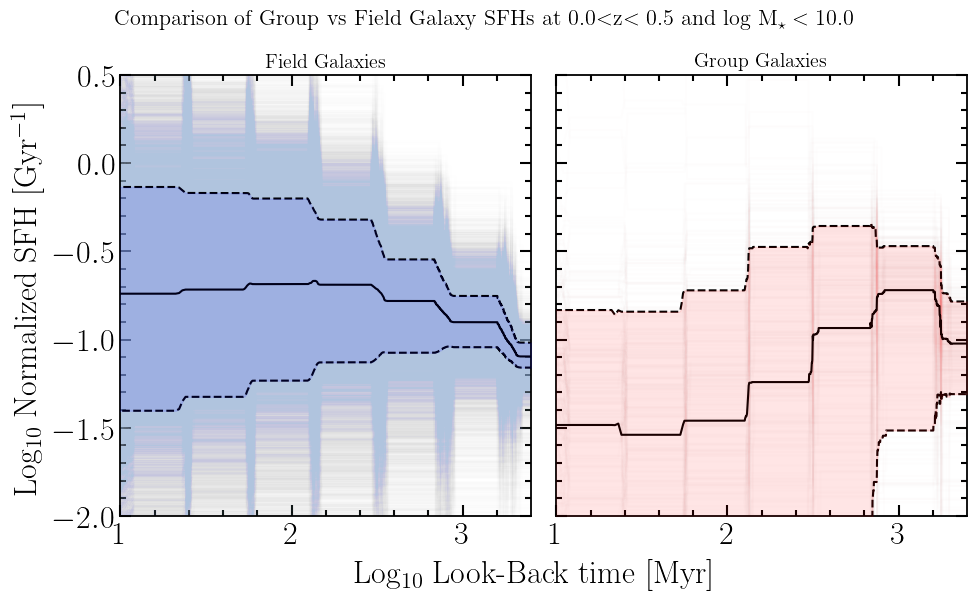

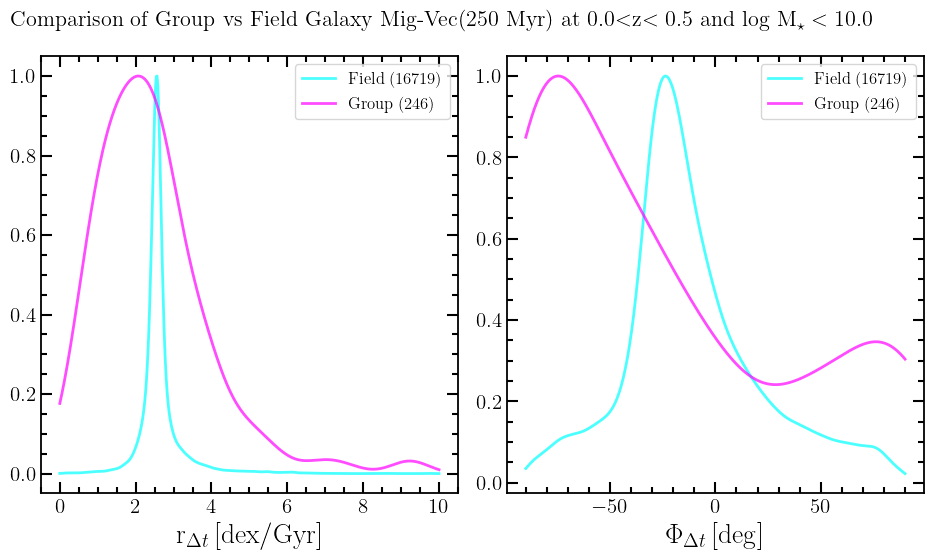

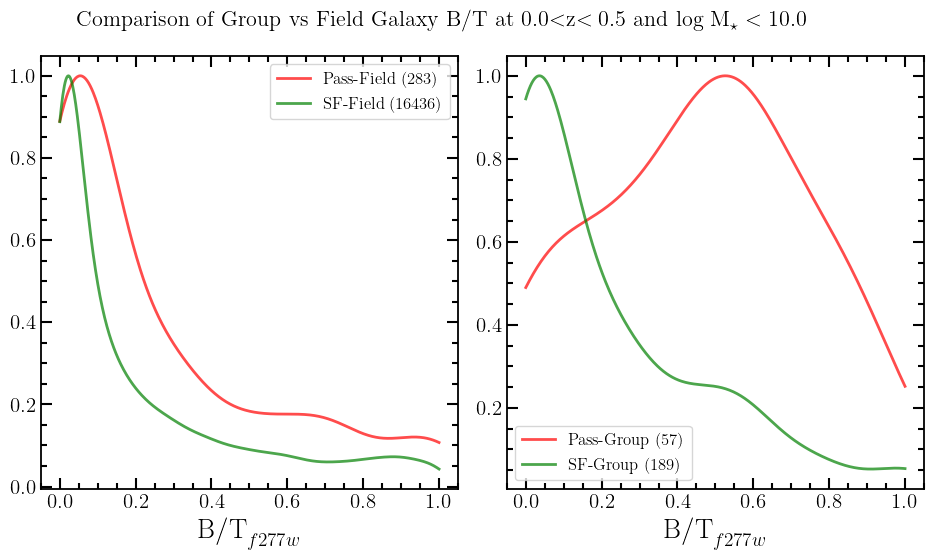

/tmp/ipykernel_150918/975644714.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_150918/975644714.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 0.5 < z < 1.0 ---
Number of galaxies in field_gal_bin: 33799
Number of galaxies in group_gal_bin: 2091
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_150918/975644714.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_150918/975644714.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_150918/975644714.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_150918/975644714.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.log10(

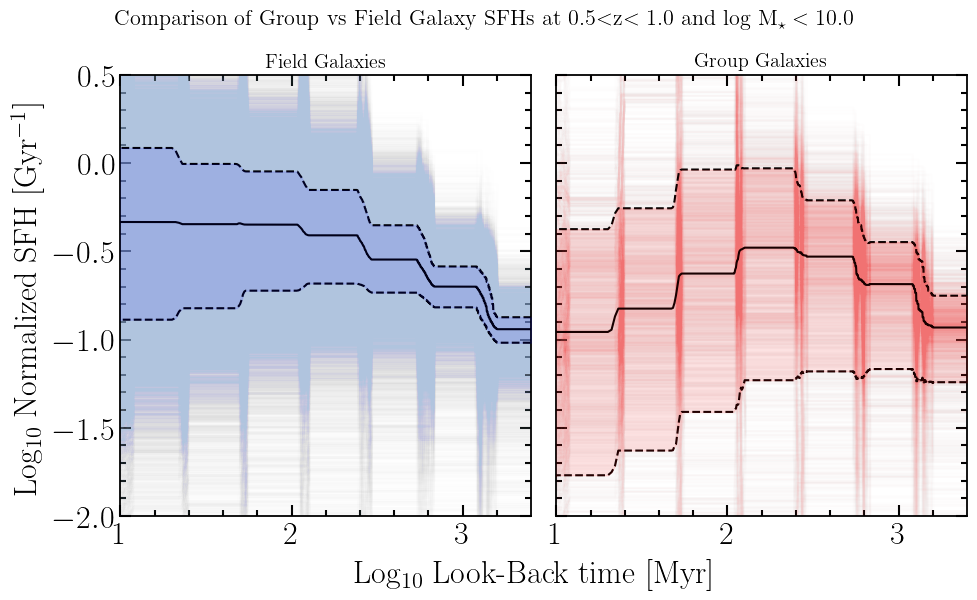

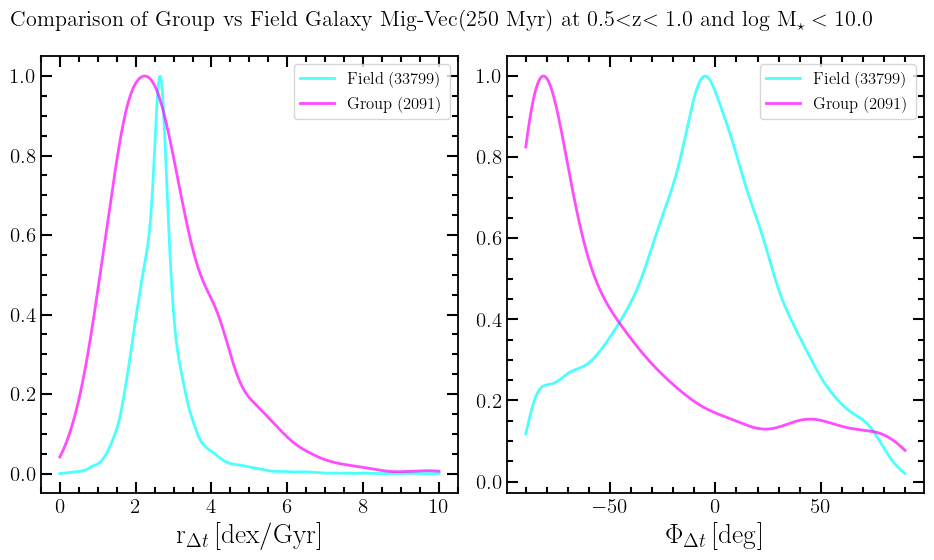

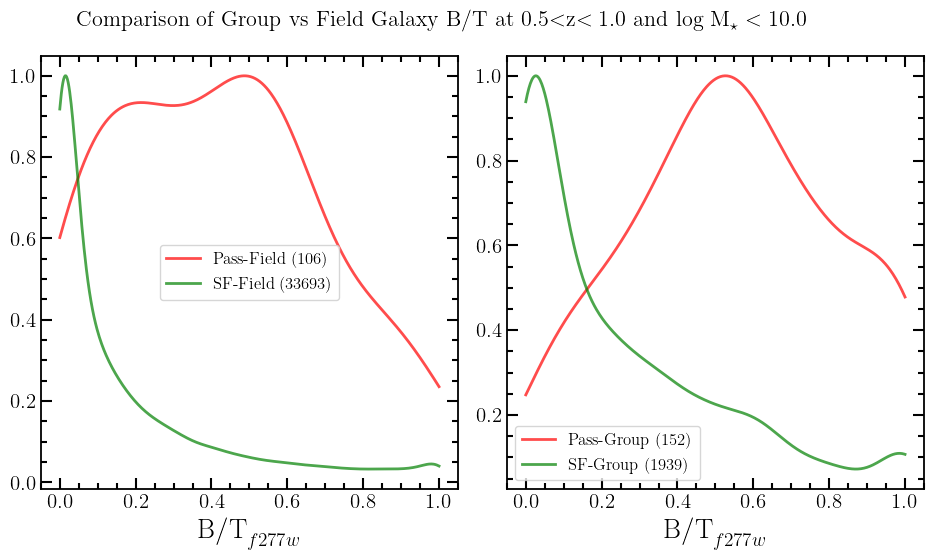

/tmp/ipykernel_150918/975644714.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_150918/975644714.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 1.0 < z < 1.5 ---
Number of galaxies in field_gal_bin: 17214
Number of galaxies in group_gal_bin: 1077
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_150918/975644714.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_150918/975644714.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_150918/975644714.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_150918/975644714.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.log10(

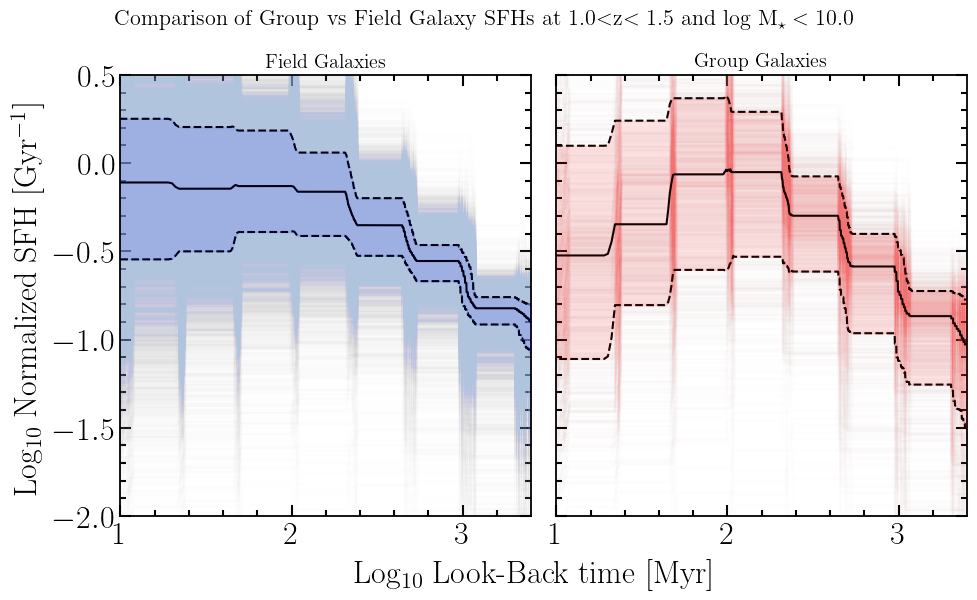

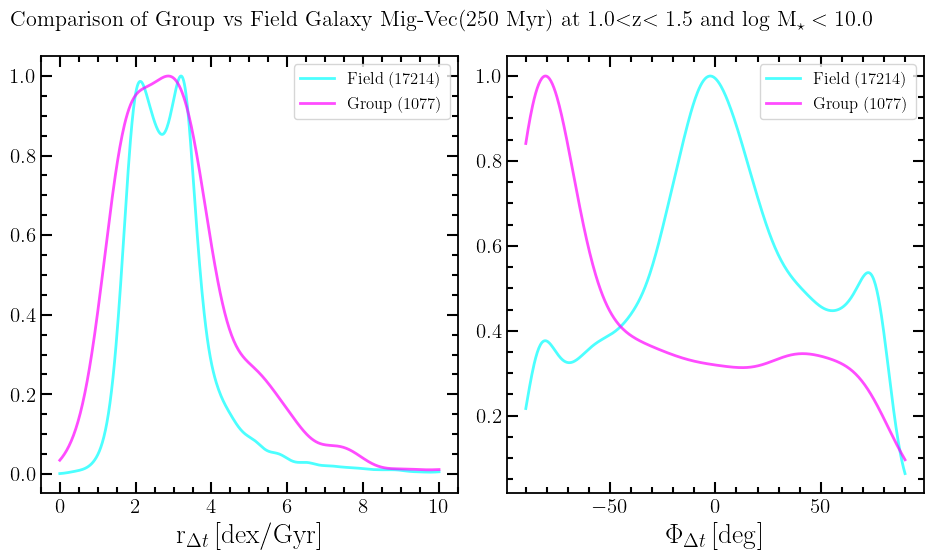

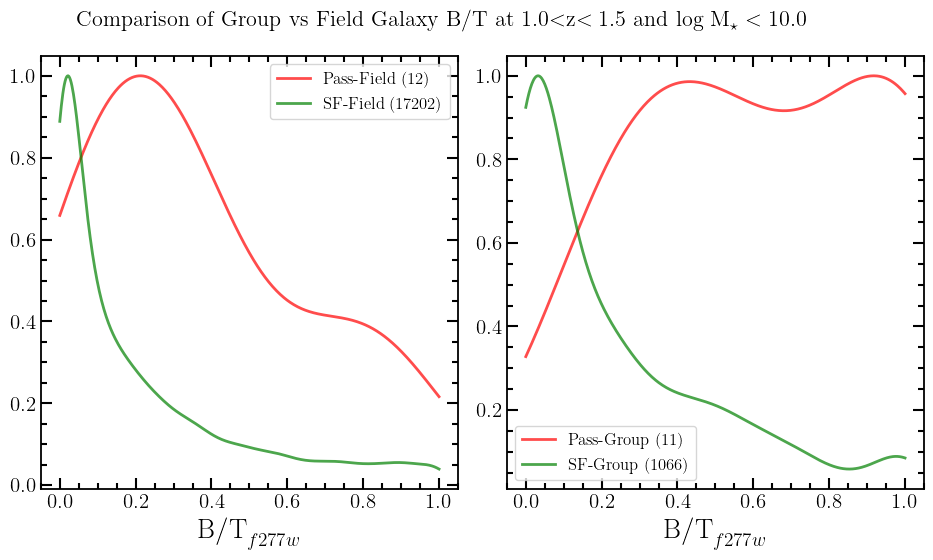

/tmp/ipykernel_150918/975644714.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_150918/975644714.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 1.5 < z < 2.0 ---
Number of galaxies in field_gal_bin: 18425
Number of galaxies in group_gal_bin: 1082
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_150918/975644714.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_150918/975644714.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_150918/975644714.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_150918/975644714.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.log10(

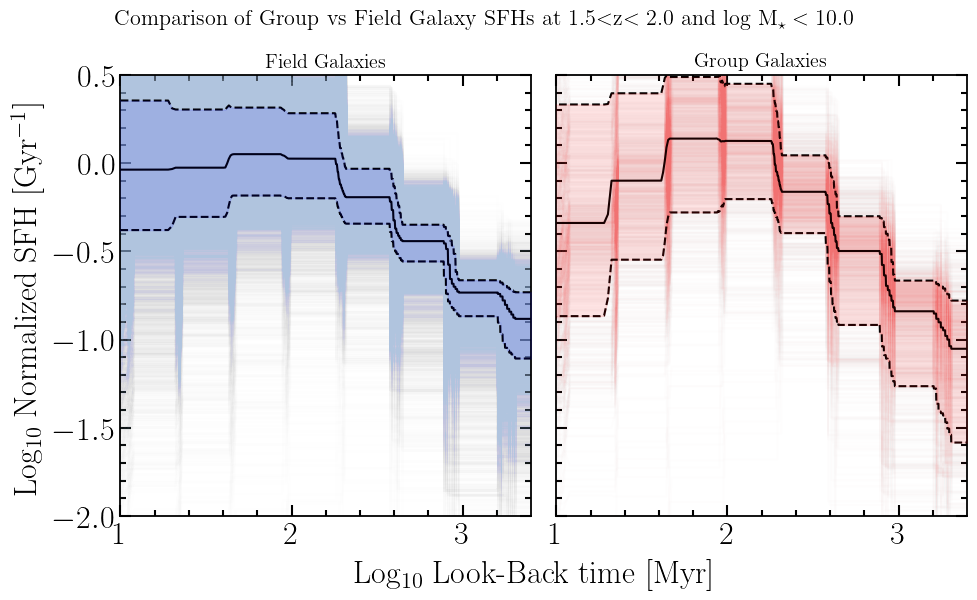

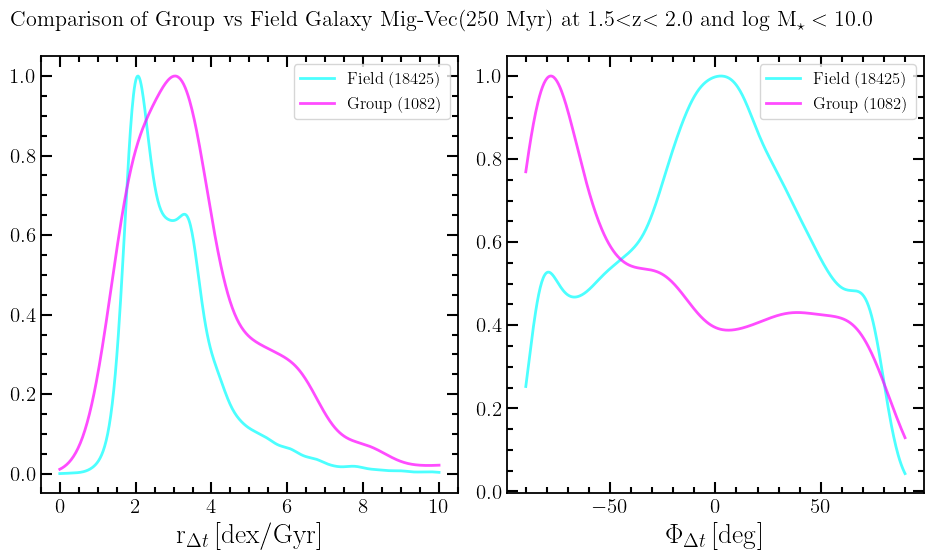

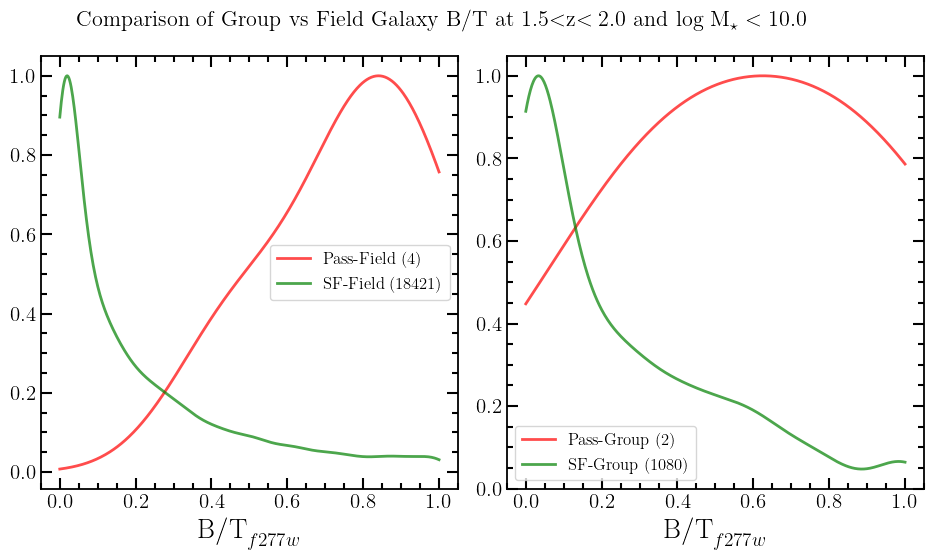

/tmp/ipykernel_150918/975644714.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_150918/975644714.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 2.0 < z < 2.5 ---
Number of galaxies in field_gal_bin: 10396
Number of galaxies in group_gal_bin: 635
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_150918/975644714.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_150918/975644714.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_150918/975644714.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_150918/975644714.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.log10(

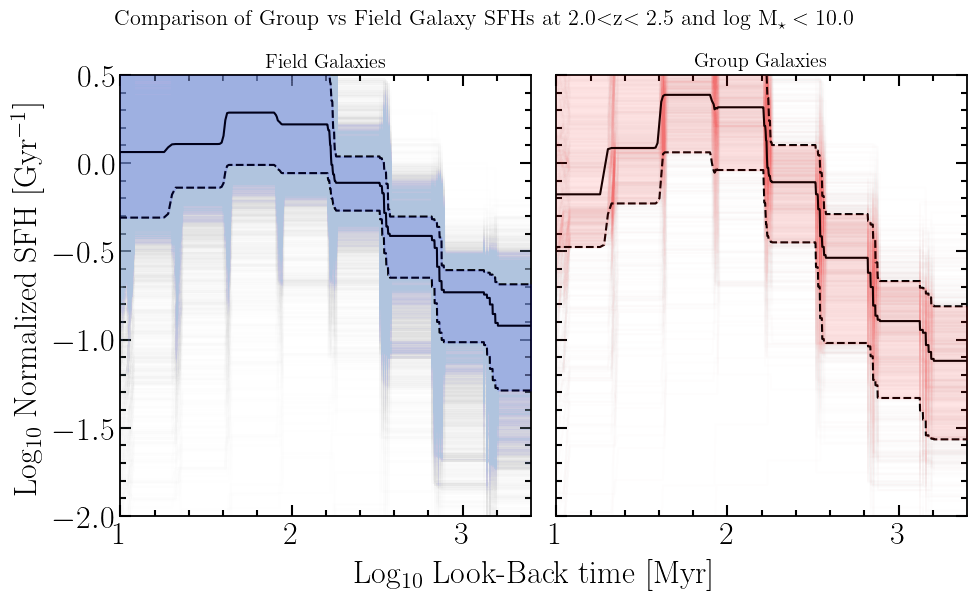

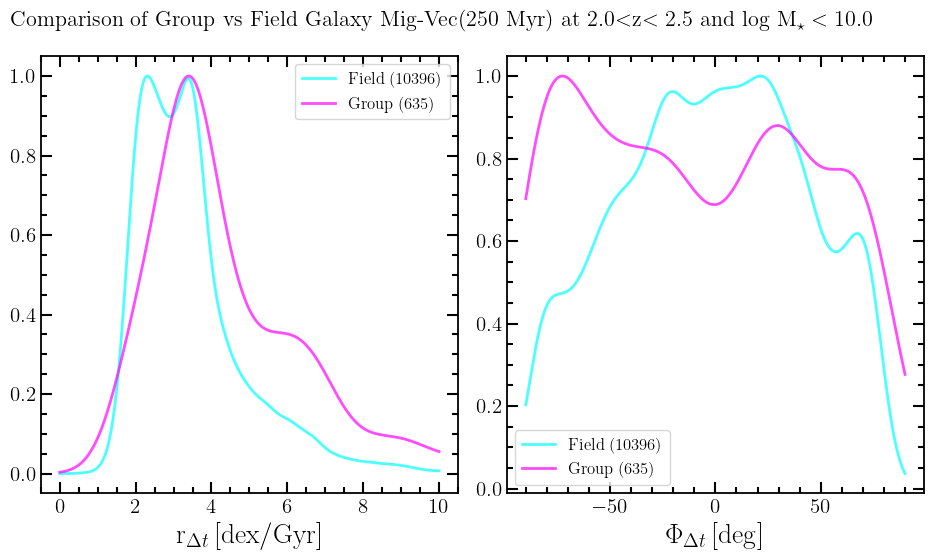

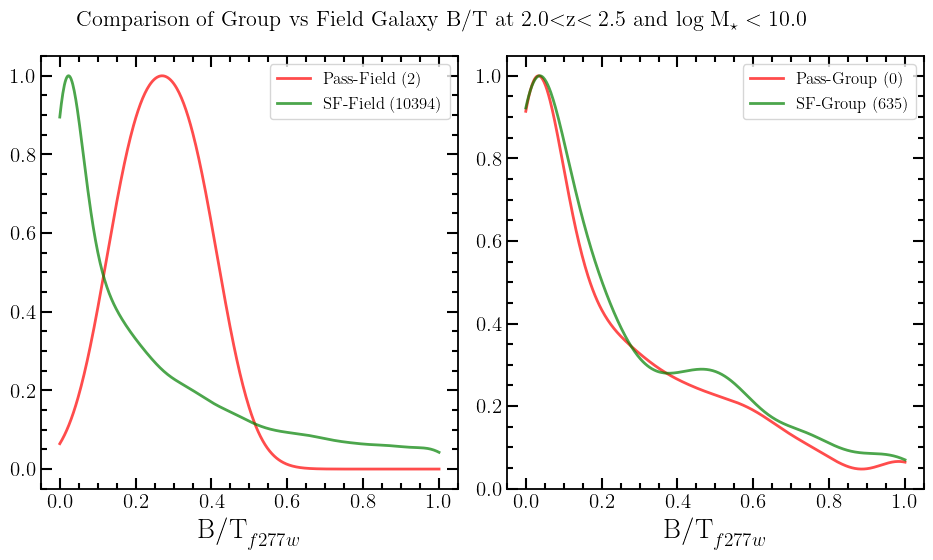

/tmp/ipykernel_150918/975644714.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_150918/975644714.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 2.5 < z < 3.0 ---
Number of galaxies in field_gal_bin: 3685
Number of galaxies in group_gal_bin: 419
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_150918/975644714.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_150918/975644714.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_150918/975644714.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_150918/975644714.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_150918/975644714.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.log10(

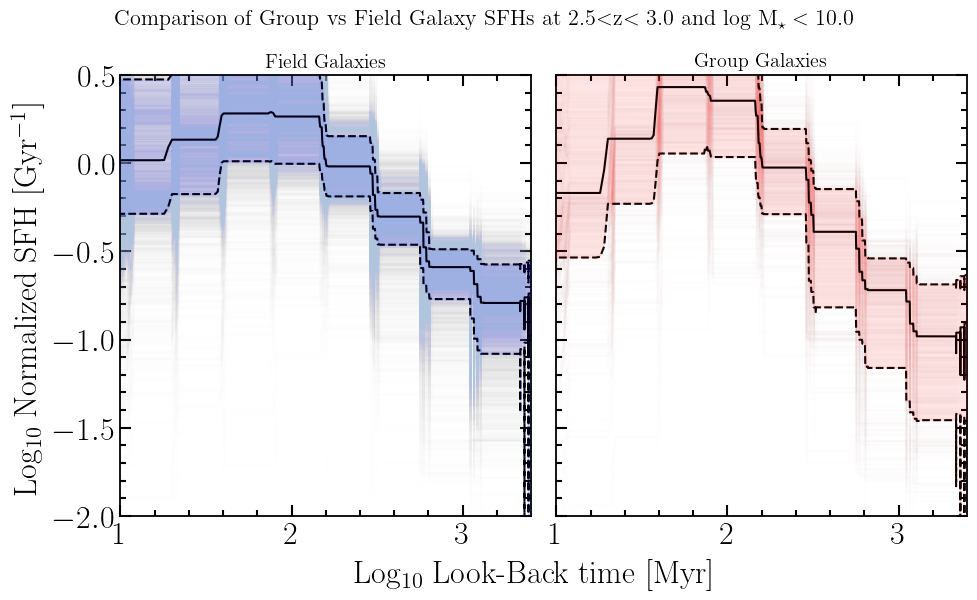

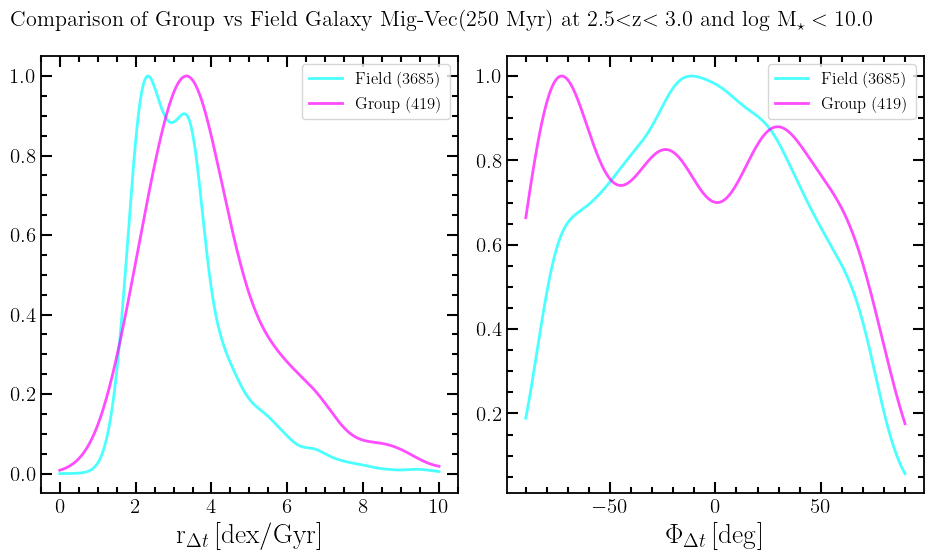

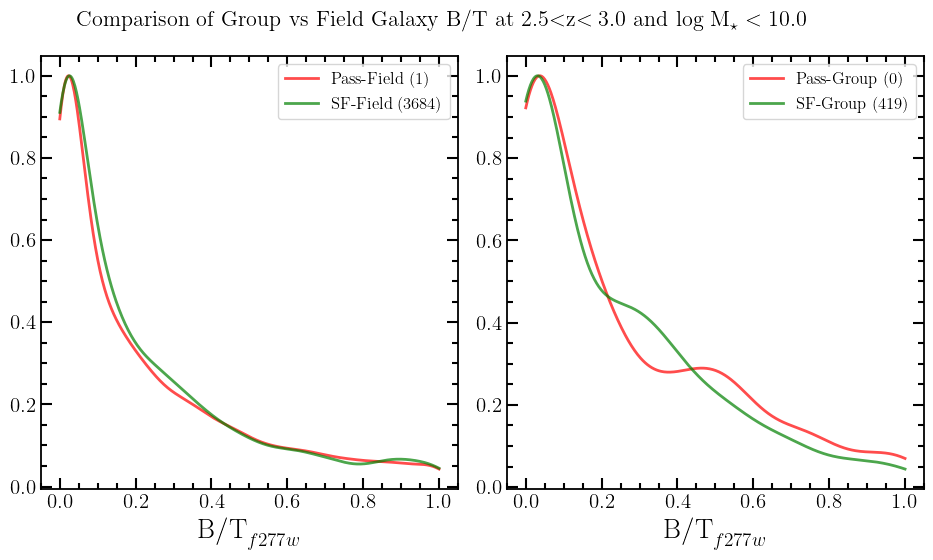

/tmp/ipykernel_150918/975644714.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_150918/975644714.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 3.0 < z < 3.7 ---
Number of galaxies in field_gal_bin: 2492
Number of galaxies in group_gal_bin: 320
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_150918/975644714.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_150918/975644714.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/home/arango/miniconda3/envs/cigale/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/home/arango/miniconda3/envs/cigale/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/tmp/ipykernel_150918/975644714.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_150918/97564471

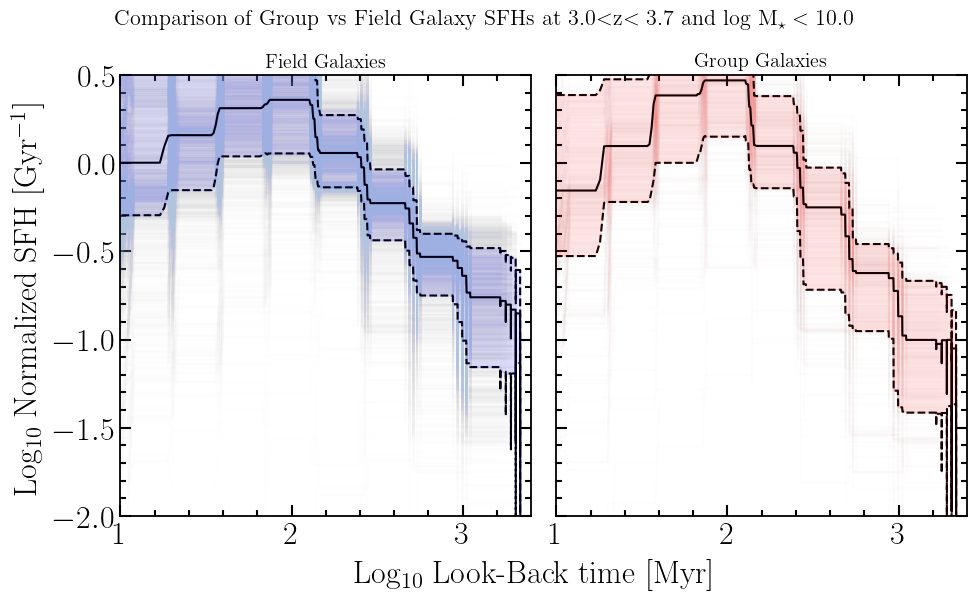

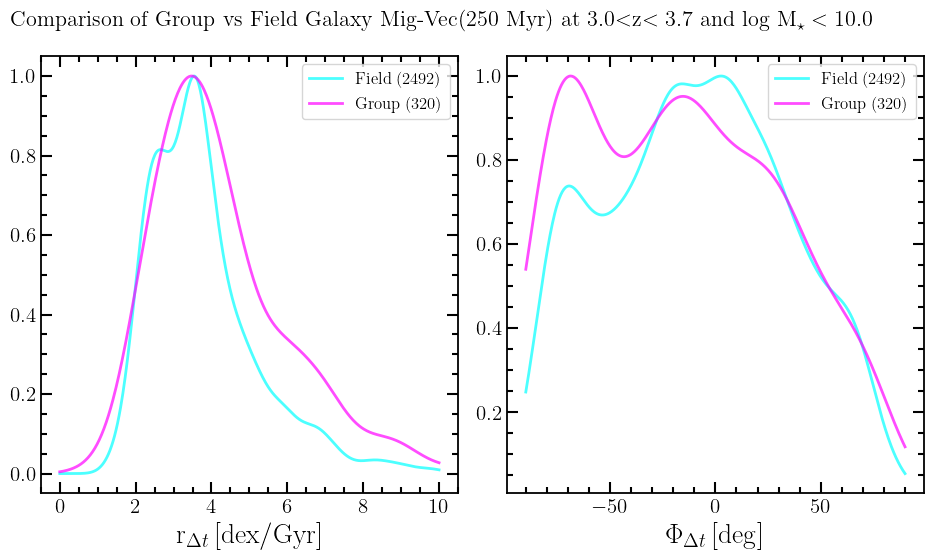

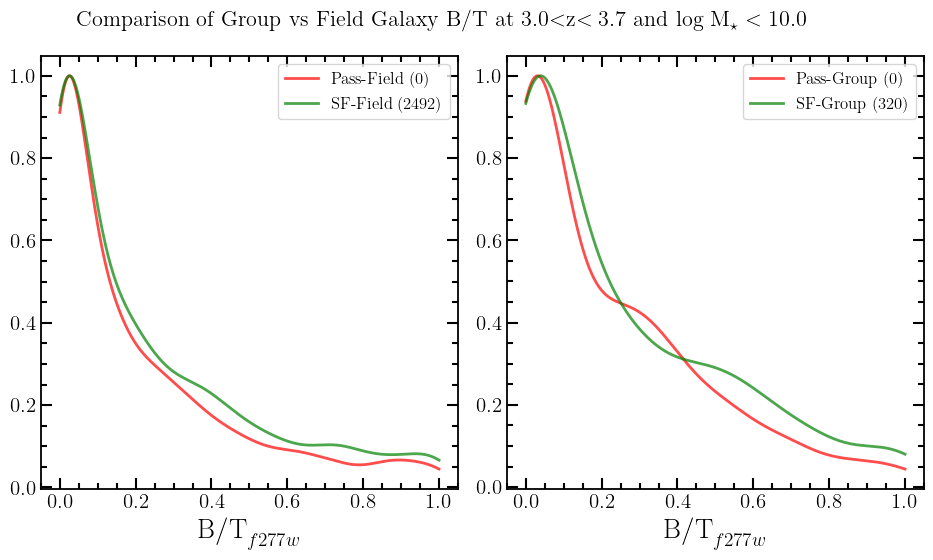

In [13]:

for min_redshift_value,max_redshift_value in [[0,0.5],[0.5,1],[1,1.5],[1.5,2],[2,2.5],[2.5,3],[3,3.7]]:    # Define the two given redshift values
    
    # Filter field_gal based on the 'best.universe.redshift' column
    # and reassign to field_gal as the request implies filtering "on the pandas df named field_gal"
    log_m_lim=10
    cond_z_phot_field=(np.log10(cigale_field_gal['mass']) <= log_m_lim) & (lephare_field_gal['zfinal'] >= min_redshift_value) & (lephare_field_gal['zfinal'] <= max_redshift_value)

    
    cigale_field_gal_bin = cigale_field_gal[cond_z_phot_field]
    lepahre_field_gal_bin = lephare_field_gal[cond_z_phot_field]
    BD_field_gal_bin = BD_field_gal[cond_z_phot_field]
    sSFR_cigale_field_bin=np.log10(cigale_field_gal_bin['sfr_100myr']/cigale_field_gal_bin['mass'])
    cond_passive_field_bin=sSFR_cigale_field_bin<=-11

    cond_z_phot_group=(np.log10(cigale_group_gal['mass']) <= log_m_lim) & (lephare_group_gal['zfinal'] >= min_redshift_value) & (lephare_group_gal['zfinal'] <= max_redshift_value)
    
    cigale_group_gal_bin = cigale_group_gal[cond_z_phot_group]
    lepahre_group_gal_bin = lephare_group_gal[cond_z_phot_group]
    BD_group_gal_bin = BD_group_gal[cond_z_phot_group]
    sSFR_cigale_group_bin=np.log10(cigale_group_gal_bin['sfr_100myr']/cigale_group_gal_bin['mass'])
    cond_passive_group_bin=sSFR_cigale_group_bin<=-11
    
    def interpolate_sfh(t_original, sfr_original, t_grid_):
        f = interp1d(t_original, sfr_original, bounds_error=False, fill_value=np.nan)
        return f(t_grid_)  # will give NaN for times outside original SFH
    
    # Assuming field_gal is your DataFrame
    
    # Identify columns matching the patterns 'bayes.sfh.time_binX' and 'sfh.sfr_binX'
    # where X goes from 1 to 9
    #columns_to_check = []
    #for i in range(1, 10):
    #    col_time = f'bayes.sfh.time_bin{i}'
    #    col_sfr = f'bayes.sfh.sfr_bin{i}'
    #    if col_time in field_gal_bin.columns:
    #        columns_to_check.append(col_time)
    #    if col_sfr in field_gal_bin.columns:
    #        columns_to_check.append(col_sfr)
    
    bin_list = ['sfh_sfr_bin' + str(i) for i in range(1, 10)]  # Bins amplitudes in M_solar by yr
    bin_time_list = ['sfh_time_bin' + str(i) for i in range(1, 10)]  # bins_time_list
    

    cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)    
    cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)

    print(f"\n--- Analyzing Redshift Bin: {min_redshift_value:.1f} < z < {max_redshift_value:.1f} ---")
    print(f"Number of galaxies in field_gal_bin: {len(cigale_field_gal_bin)}")
    print(f"Number of galaxies in group_gal_bin: {len(cigale_group_gal_bin)}")

    # Get unique IDs for each bin
    cigale_field_ids = set(cigale_field_gal_bin['id'].unique())
    cigale_group_ids = set(cigale_group_gal_bin['id'].unique())

        # Check for overlap
    cigale_common_ids = cigale_field_ids.intersection(cigale_group_ids)
    print(f"Number of common galaxies (by 'id') in both bins: {len(cigale_common_ids)}")
    if len(cigale_field_ids) > 0:
        print(f"Percentage of field_gal_bin also in group_gal_bin: {len(cigale_common_ids) / len(cigale_field_ids) * 100:.2f}%")
    if len(cigale_group_ids) > 0:
        print(f"Percentage of group_gal_bin also in field_gal_bin: {len(cigale_common_ids) / len(cigale_group_ids) * 100:.2f}%")

    if len(cigale_field_ids) == len(cigale_group_ids) and len(cigale_common_ids) == len(cigale_field_ids) and len(cigale_field_ids) > 0:
        print("WARNING: field_gal_bin and group_gal_bin contain the exact same set of galaxies for this redshift bin!")
    elif len(cigale_common_ids) / len(cigale_field_ids) > 0.8 or len(cigale_common_ids) / len(cigale_group_ids) > 0.8:
        print("NOTE: There is a very high overlap ( > 80%) between field_gal_bin and group_gal_bin for this redshift bin.")
   
            
    #size=400
    #idx_sample=cigale_field_gal_bin.sample(size,replace=False).index
    idx_sample=cigale_field_gal_bin.index
    
    window=5
    max_size=2511
    A = cigale_field_gal_bin[bin_list]
    B = cigale_field_gal_bin[bin_time_list]
    
    
    t_grid = np.linspace(0, max_size, max_size)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)
    fig.suptitle("Comparison of Group vs Field Galaxy SFHs at %.1f$<$z$<%.1f$ and log M$_\star<%.1f$"%(min_redshift_value,max_redshift_value,log_m_lim), fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # adjust so title fits
    axs = axs.flatten()


    fig_, axs_ = plt.subplots(1, 2, figsize=(10, 6), sharex=False, sharey=False)
    fig_.suptitle("Comparison of Group vs Field Galaxy Mig-Vec(250 Myr) at %.1f$<$z$<%.1f$ and log M$_\star<%.1f$"%(min_redshift_value,max_redshift_value,log_m_lim), fontsize=16)
    fig_.tight_layout(rect=[0, 0, 1, 0.95])  # adjust so title fits
    axs_ = axs_.flatten()


    # Calculate KDE for cigale_field_gal_bin
    x_grid_cigale_field_gal_bin = np.linspace(0, 10, 500)
    size_data=len(cigale_field_gal_bin['sfr_mass_vector_norm'].values*1E3)
    if len(cigale_field_gal_bin['sfr_mass_vector_norm'].values*1E3) > 1:
        kde_cigale_field_gal_bin = gaussian_kde(cigale_field_gal_bin['sfr_mass_vector_norm'].values*1E3)
        density_cigale_field_gal_bin = kde_cigale_field_gal_bin(x_grid_cigale_field_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_cigale_field_gal_bin.size > 0 and density_cigale_field_gal_bin.max() > 0:
        axs_[0].plot(x_grid_cigale_field_gal_bin, density_cigale_field_gal_bin / density_cigale_field_gal_bin.max(), 
                 alpha=0.7, color='cyan', label='Field (%i)'%size_data, linewidth=2)


    # Calculate KDE for cigale_group_gal_bin
    x_grid_cigale_group_gal_bin = np.linspace(0, 10, 500)
    size_data=len(cigale_group_gal_bin['sfr_mass_vector_norm'].values*1E3)
    if size_data > 1:
        kde_cigale_group_gal_bin = gaussian_kde(cigale_group_gal_bin['sfr_mass_vector_norm'].values*1E3)
        density_cigale_group_gal_bin = kde_cigale_group_gal_bin(x_grid_cigale_group_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_cigale_group_gal_bin.size > 0 and density_cigale_group_gal_bin.max() > 0:
        axs_[0].plot(x_grid_cigale_group_gal_bin, density_cigale_group_gal_bin / density_cigale_group_gal_bin.max(), 
                 alpha=0.7, color='magenta', label='Group (%i)'%size_data, linewidth=2)


    
    
    #axs_[0].hist(cigale_field_gal_bin['sfr_mass_vector_norm']*1E3,density=True,bins=np.linspace(0,10,30),alpha=0.5,color='cyan',label='Field')
    #axs_[0].hist(cigale_group_gal_bin['sfr_mass_vector_norm']*1E3,density=True,bins=np.linspace(0,10,30),alpha=0.5,color='magenta',label='Group')
    axs_[0].set_xlabel(r'$\mathrm{r}_{\Delta t} \,[\mathrm{dex/Gyr}]$')


  # Calculate KDE for cigale_field_gal_bin
    x_grid_cigale_field_gal_bin = np.linspace(-90, 90, 500)
    size_data=len(cigale_field_gal_bin['sfr_mass_vector_dir'].values)
    if size_data > 1:
        kde_cigale_field_gal_bin = gaussian_kde(cigale_field_gal_bin['sfr_mass_vector_dir'].values)
        density_cigale_field_gal_bin = kde_cigale_field_gal_bin(x_grid_cigale_field_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_cigale_field_gal_bin.size > 0 and density_cigale_field_gal_bin.max() > 0:
        axs_[1].plot(x_grid_cigale_field_gal_bin, density_cigale_field_gal_bin / density_cigale_field_gal_bin.max(), 
                 alpha=0.7, color='cyan', label='Field (%i)'%size_data, linewidth=2)


    # Calculate KDE for cigale_group_gal_bin
    x_grid_cigale_group_gal_bin = np.linspace(-90, 90, 500)
    size_data=len(cigale_group_gal_bin['sfr_mass_vector_dir'].values)
    if size_data > 1:
        kde_cigale_group_gal_bin = gaussian_kde(cigale_group_gal_bin['sfr_mass_vector_dir'].values)
        density_cigale_group_gal_bin = kde_cigale_group_gal_bin(x_grid_cigale_group_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_cigale_group_gal_bin.size > 0 and density_cigale_group_gal_bin.max() > 0:
        axs_[1].plot(x_grid_cigale_group_gal_bin, density_cigale_group_gal_bin / density_cigale_group_gal_bin.max(), 
                 alpha=0.7, color='magenta', label='Group (%i)'%size_data, linewidth=2)

    

    #axs_[1].hist(cigale_field_gal_bin['sfr_mass_vector_dir'],density=True,bins=30,alpha=0.5,color='cyan',label='Field')
    #axs_[1].hist(cigale_group_gal_bin['sfr_mass_vector_dir'],density=True,bins=30,alpha=0.5,color='magenta',label='Group')
    axs_[1].set_xlabel(r'$\Phi_{\Delta t}\,[\mathrm{deg}]$')

    fig_.tight_layout(rect=[0.05, 0.05, 1, 1])
    axs_[0].legend()
    axs_[1].legend()

    

    fig__, axs__= plt.subplots(1, 2, figsize=(10, 6), sharex=False, sharey=False)
    fig__.suptitle("Comparison of Group vs Field Galaxy B/T at %.1f$<$z$<%.1f$ and log M$_\star<%.1f$"%(min_redshift_value,max_redshift_value,log_m_lim), fontsize=16)
    fig__.tight_layout(rect=[0, 0, 1, 0.95])  # adjust so title fits
    axs__ = axs__.flatten()
    
    #bins_B_T=np.linspace(0,1,30)
    #counts_norm_field_pass, bin_edges_norm =np.histogram(BD_field_gal_bin['b/t_f277w'][cond_passive_field_bin],bins=bins_B_T)
    #counts_norm_field_SF, _ =np.histogram(BD_field_gal_bin['b/t_f277w'][~cond_passive_field_bin],bins=bins_B_T)
    #counts_norm_group_pass, _=np.histogram(BD_group_gal_bin['b/t_f277w'][cond_passive_group_bin],bins=bins_B_T)
    #counts_norm_group_SF, _=np.histogram(BD_group_gal_bin['b/t_f277w'][~cond_passive_group_bin],bins=bins_B_T)
    #max_count_norm_field_pass = max(counts_norm_field_pass)
    #max_count_norm_field_SF = max(counts_norm_field_SF)
    #max_count_norm_group_pass = max(counts_norm_group_pass)
    #max_count_norm_group_SF = max(counts_norm_group_SF)
    #axs__[0].step(bin_edges_norm[:-1], counts_norm_field_pass / max_count_norm_field_pass, where='post', alpha=0.5, color='cyan', label='Pass', linewidth=2)
    #axs__[0].step(bin_edges_norm[:-1], counts_norm_field_SF / max_count_norm_field_SF, where='post', alpha=0.5, color='magenta', label='SF', linewidth=2)
    #axs__[1].step(bin_edges_norm[:-1], counts_norm_group_pass / max_count_norm_group_pass, where='post', alpha=0.5, color='cyan', label='Pass', linewidth=2)
    #axs__[1].step(bin_edges_norm[:-1], counts_norm_group_SF / max_count_norm_group_SF, where='post', alpha=0.5, color='magenta', label='SF', linewidth=2)


    # Calculate KDE for cigale_field_gal_bin
    x_grid_BD_field_gal_bin = np.linspace(0, 1, 500)
    size_data=len(BD_field_gal_bin['b/t_f277w'].values[cond_passive_field_bin])
    if size_data > 1:
        kde_BD_field_gal_bin = gaussian_kde(BD_field_gal_bin['b/t_f277w'].values[cond_passive_field_bin])
        density_BD_field_gal_bin = kde_BD_field_gal_bin(x_grid_BD_field_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_BD_field_gal_bin.size > 0 and density_BD_field_gal_bin.max() > 0:
        axs__[0].plot(x_grid_BD_field_gal_bin, density_BD_field_gal_bin / density_BD_field_gal_bin.max(), 
                 alpha=0.7, color='red',label='Pass-Field (%i)'%size_data, linewidth=2)

    # Calculate KDE for cigale_field_gal_bin
    x_grid_BD_field_gal_bin = np.linspace(0, 1, 500)
    size_data=len(BD_field_gal_bin['b/t_f277w'].values[~cond_passive_field_bin])
    if size_data > 1:
        kde_BD_field_gal_bin = gaussian_kde(BD_field_gal_bin['b/t_f277w'].values[~cond_passive_field_bin])
        density_BD_field_gal_bin = kde_BD_field_gal_bin(x_grid_BD_field_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_BD_field_gal_bin.size > 0 and density_BD_field_gal_bin.max() > 0:
        axs__[0].plot(x_grid_BD_field_gal_bin, density_BD_field_gal_bin / density_BD_field_gal_bin.max(), 
                 alpha=0.7, color='green',label='SF-Field (%i)'%size_data, linewidth=2)


    #axs__[0].hist(BD_field_gal_bin['b/t_f277w'][cond_passive_field_bin],density=True,bins=30,alpha=0.5,color='red',label='Pass-Field')
    #axs__[0].hist(BD_field_gal_bin['b/t_f277w'][~cond_passive_field_bin],density=True,bins=30,alpha=0.5,color='green',label='SF-Field')
    axs__[0].set_xlabel(r'$\mathrm{B/T}_{f277w}$')


    # Calculate KDE for cigale_field_gal_bin
    x_grid_BD_group_gal_bin = np.linspace(0, 1, 500)
    size_data=len(BD_group_gal_bin['b/t_f277w'].values[cond_passive_group_bin])
    if len(BD_group_gal_bin['b/t_f277w'].values[cond_passive_group_bin]) > 1:
        kde_BD_group_gal_bin = gaussian_kde(BD_group_gal_bin['b/t_f277w'].values[cond_passive_group_bin])
        density_BD_group_gal_bin = kde_BD_group_gal_bin(x_grid_BD_group_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_BD_group_gal_bin.size > 0 and density_BD_group_gal_bin.max() > 0:
        axs__[1].plot(x_grid_BD_field_gal_bin, density_BD_group_gal_bin / density_BD_group_gal_bin.max(), 
                 alpha=0.7, color='red',label='Pass-Group (%i)'%size_data, linewidth=2)

    # Calculate KDE for cigale_field_gal_bin
    x_grid_BD_group_gal_bin = np.linspace(0, 1, 500)
    size_data=len(BD_group_gal_bin['b/t_f277w'].values[~cond_passive_group_bin])
    if size_data > 1:
        kde_BD_group_gal_bin = gaussian_kde(BD_group_gal_bin['b/t_f277w'].values[~cond_passive_group_bin])
        density_BD_group_gal_bin = kde_BD_group_gal_bin(x_grid_BD_group_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_BD_group_gal_bin.size > 0 and density_BD_group_gal_bin.max() > 0:
        axs__[1].plot(x_grid_BD_group_gal_bin, density_BD_group_gal_bin / density_BD_group_gal_bin.max(), 
                 alpha=0.7, color='green',label='SF-Group (%i)'%size_data, linewidth=2)



    #axs__[1].hist(BD_group_gal_bin['b/t_f277w'][cond_passive_group_bin],density=True,bins=30,alpha=0.5,color='red',label='Pass-Group')
    #axs__[1].hist(BD_group_gal_bin['b/t_f277w'][~cond_passive_group_bin],density=True,bins=30,alpha=0.5,color='green',label='SF-Group')
    axs__[1].set_xlabel(r'$\mathrm{B/T}_{f277w}$')

    fig__.tight_layout(rect=[0.05, 0.05, 1, 1])
    axs__[0].legend()
    axs__[1].legend()



    
    
    def rolling_window(a, window):
        pad = np.ones(len(a.shape), dtype=np.int32)
        pad[-1] = window - 1
        pad = list(zip(pad, np.zeros(len(a.shape), dtype=np.int32)))
        a = np.pad(a, pad, mode='reflect')
        shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
        strides = a.strides + (a.strides[-1],)
        return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
    
    sfr_mean_field=np.zeros((len(idx_sample),max_size))
    k=0
    for m in idx_sample:
        amplitudes = A.loc[m].values
        bins = np.append(0, B.loc[m].values).astype(int)
        sfr = np.zeros(bins[-1])
        time = np.linspace(0, bins[-1], bins[-1]).astype(int)
    
                
        for n in range(len(bins) - 1):
            time_bin = np.where((time >= bins[n]) & (time <= bins[n + 1] - 1))
            sfr[time_bin] = amplitudes[n]
        
    
        
        sfr_mean_field[k]=interpolate_sfh(time,sfr,t_grid)
    
        #sfr_mean[k]=np.mean(rolling_window(sfr[:max_size],window),axis=1)
        #sfr_var += sfr[:500] ** 2
        axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
        k+=1
    
        
    #sfr_mean=np.median(sfr_mean,axis=0)
    #sfr_std = np.sqrt(sfr_var / len(idx_sample) - sfr_mean ** 2)
    
    axs[0].set_title("Field Galaxies")
    axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
    #axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field[cond_passive_field_bin], axis=0))+9,c='k')
    #axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field[~cond_passive_field_bin], axis=0))+9,c='k')
    axs[0].set_xlim(np.log10(10), np.log10(max_size))
    axs[0].set_ylim(-3.2, 1)
    
    
    p16 = np.nanpercentile(np.log10(sfr_mean_field)+9, 16, axis=0)
    p50 = np.nanpercentile(np.log10(sfr_mean_field)+9, 50, axis=0)  # median
    p84 = np.nanpercentile(np.log10(sfr_mean_field)+9, 84, axis=0)
    
    axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
    axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
    axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")

    
    #axs[0].set_xlabel('Log$_{10}$Look-Back time [Myr]')
    #axs[0].set_ylabel('Log$_{10}$ Normalized SFH [Gyr$^{-1}$]')
    
    
    
    #idx_sample=cigale_group_gal_bin.sample(size,replace=False).index
    idx_sample=cigale_group_gal_bin.index
    
    
    A = cigale_group_gal_bin[bin_list]
    
    B = cigale_group_gal_bin[bin_time_list]
    
    sfr_mean_group=np.zeros((len(idx_sample),max_size))
    
    k=0
    for m in idx_sample:
        amplitudes = A.loc[m].values
        bins = np.append(0, B.loc[m].values).astype(int)
        sfr = np.zeros(bins[-1])
        time = np.linspace(0, bins[-1], bins[-1]).astype(int)
    
                
        for n in range(len(bins) - 1):
            time_bin = np.where((time >= bins[n]) & (time <= bins[n + 1] - 1))
            sfr[time_bin] = amplitudes[n]
        
    
        
        sfr_mean_group[k]=interpolate_sfh(time,sfr,t_grid)
    
        #sfr_mean[k]=np.mean(rolling_window(sfr[:max_size],window),axis=1)
        #sfr_var += sfr[:500] ** 2
        axs[1].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#F08080')
        k+=1
    
        
    #sfr_mean=np.median(sfr_mean,axis=0)
    #sfr_std = np.sqrt(sfr_var / len(idx_sample) - sfr_mean ** 2)
    
    axs[1].set_title("Group Galaxies")
    axs[1].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_group, axis=0))+9,c='k')
    #axs[1].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_group[cond_passive_group_bin], axis=0))+9,c='k')
    #axs[1].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_group[~cond_passive_group_bin], axis=0))+9,c='k')
    axs[1].set_xlim(np.log10(10), np.log10(max_size))
    #axs[1].set_ylim(-3.2, 1)
    axs[1].set_ylim(-2, 0.5)
    
    
    
    p16 = np.nanpercentile(np.log10(sfr_mean_group)+9, 16, axis=0)
    p50 = np.nanpercentile(np.log10(sfr_mean_group)+9, 50, axis=0)  # median
    p84 = np.nanpercentile(np.log10(sfr_mean_group)+9, 84, axis=0)
    
    axs[1].fill_between(np.log10(t_grid), p16, p84, color='red', alpha=0.1, label='16–84th percentile',zorder=10)
    axs[1].plot(np.log10(t_grid),p16,c='k',ls="--")
    axs[1].plot(np.log10(t_grid),p84,c='k',ls="--")
    
    #axs[1].set_xlabel('Log$_{10}$Look-Back time [Myr]')
    #axs[1].set_ylabel('Log$_{10}$ Normalized SFH [Gyr$^{-1}$]')
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=23)  # Adjust the label size as needed
        ax.tick_params(axis='both', which='minor', labelsize=23)  # Adjust for minor ticks if needed
    
    
    fig.text(0.55, 0.025, 'Log$_{10}$ Look-Back time [Myr]', ha='center', fontsize=23)
    fig.text(0.025, 0.5, 'Log$_{10}$ Normalized SFH [Gyr$^{-1}$]', va='center', rotation='vertical', fontsize=23)
    fig.tight_layout(rect=[0.05, 0.05, 1, 1])

    plt.show()



    


/tmp/ipykernel_559780/3218514759.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_559780/3218514759.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 0.0 < z < 0.5 ---
Number of galaxies in field_gal_bin: 50
Number of galaxies in group_gal_bin: 50
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_559780/3218514759.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_559780/3218514759.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_559780/3218514759.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_559780/3218514759.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.

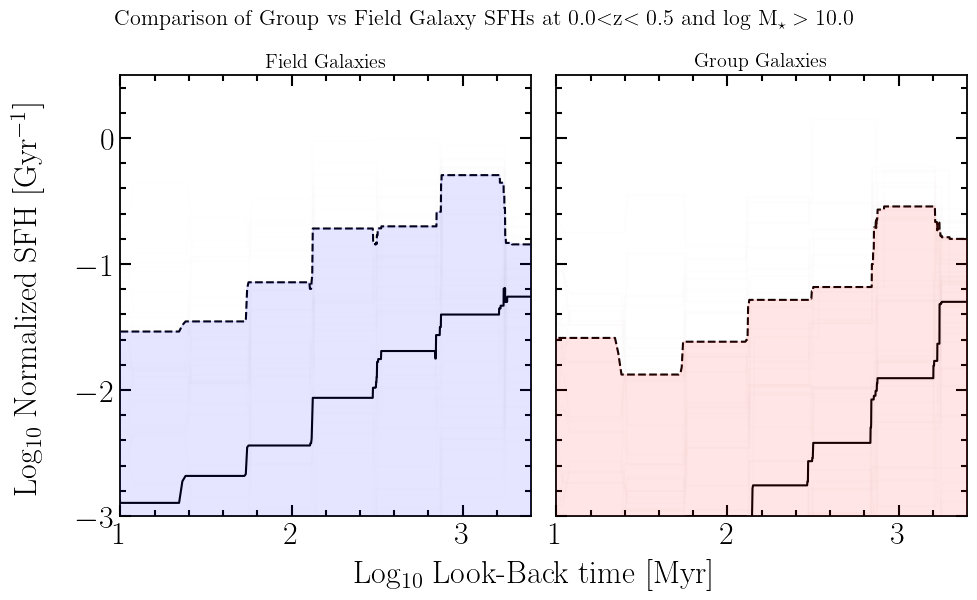

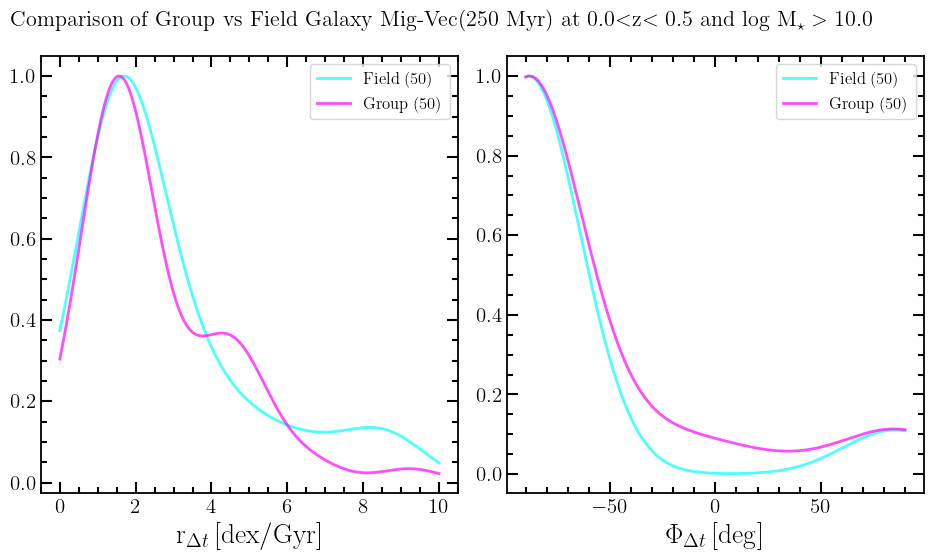

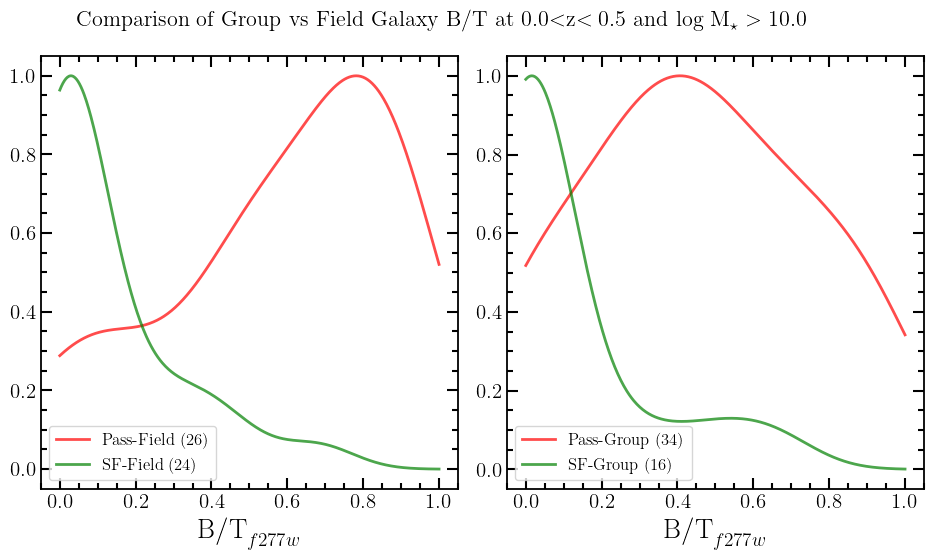

/tmp/ipykernel_559780/3218514759.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_559780/3218514759.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 0.5 < z < 1.0 ---
Number of galaxies in field_gal_bin: 763
Number of galaxies in group_gal_bin: 642
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_559780/3218514759.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_559780/3218514759.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_559780/3218514759.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_559780/3218514759.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.

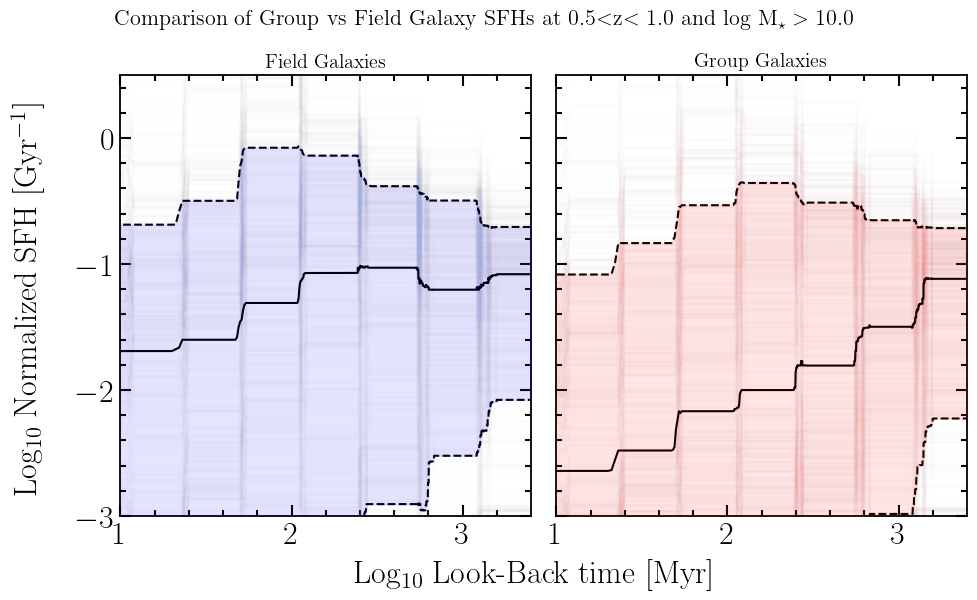

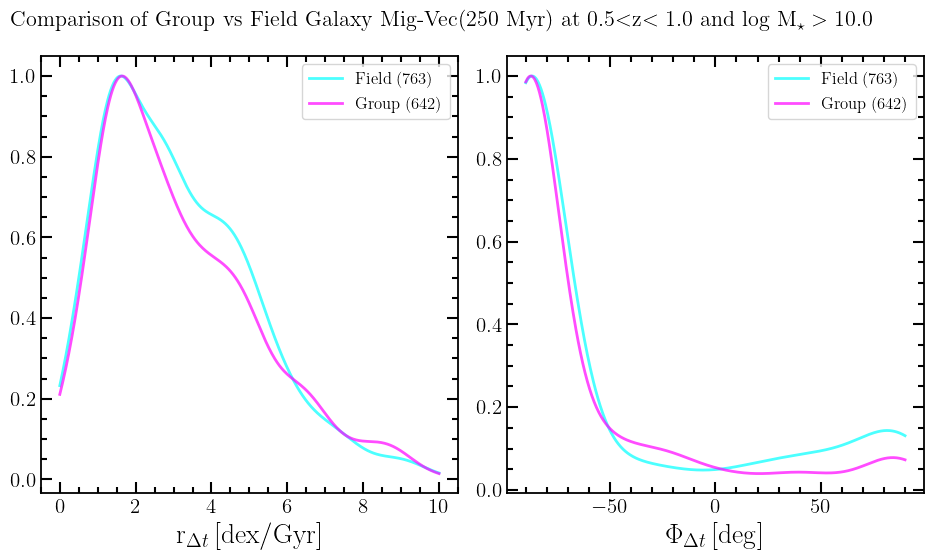

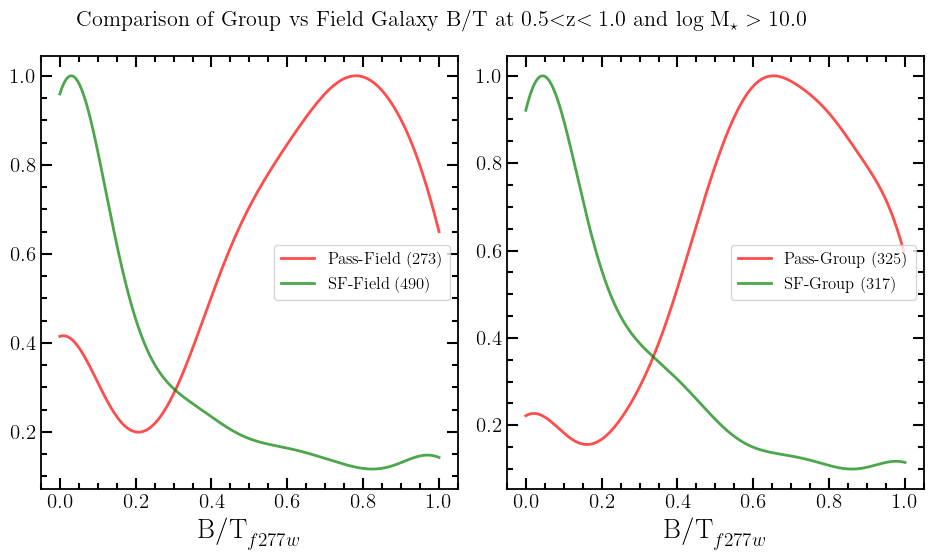

/tmp/ipykernel_559780/3218514759.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_559780/3218514759.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 1.0 < z < 1.5 ---
Number of galaxies in field_gal_bin: 411
Number of galaxies in group_gal_bin: 229
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_559780/3218514759.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_559780/3218514759.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_559780/3218514759.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_559780/3218514759.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.

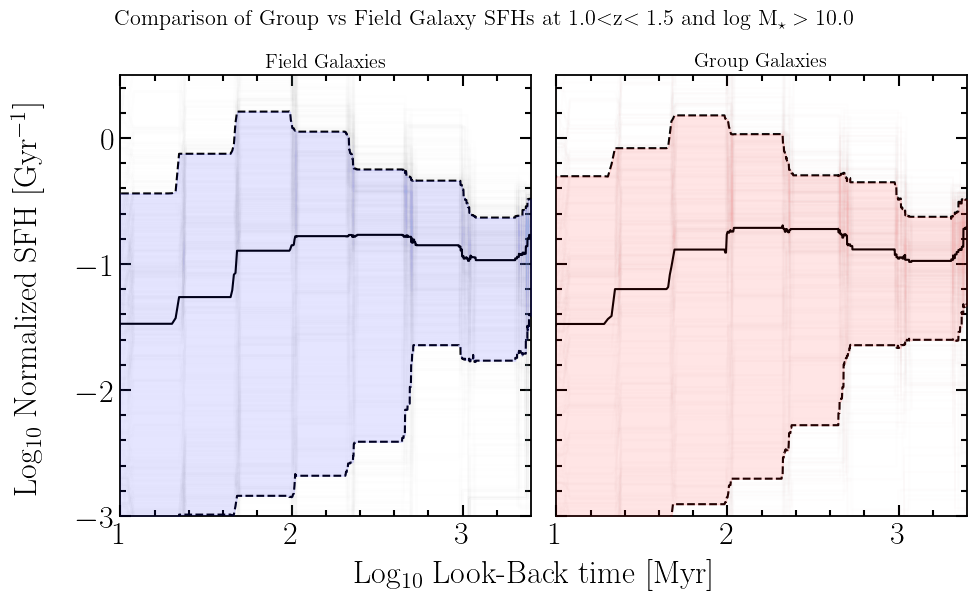

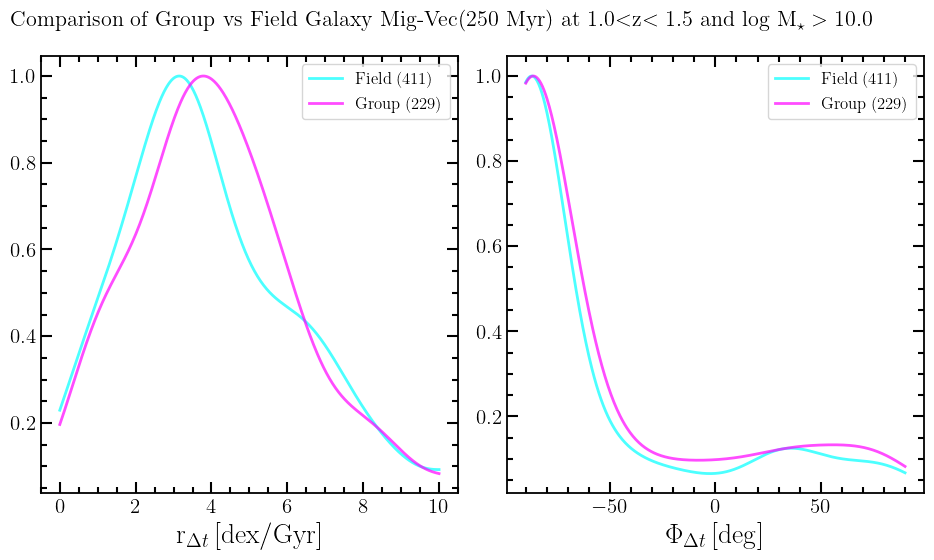

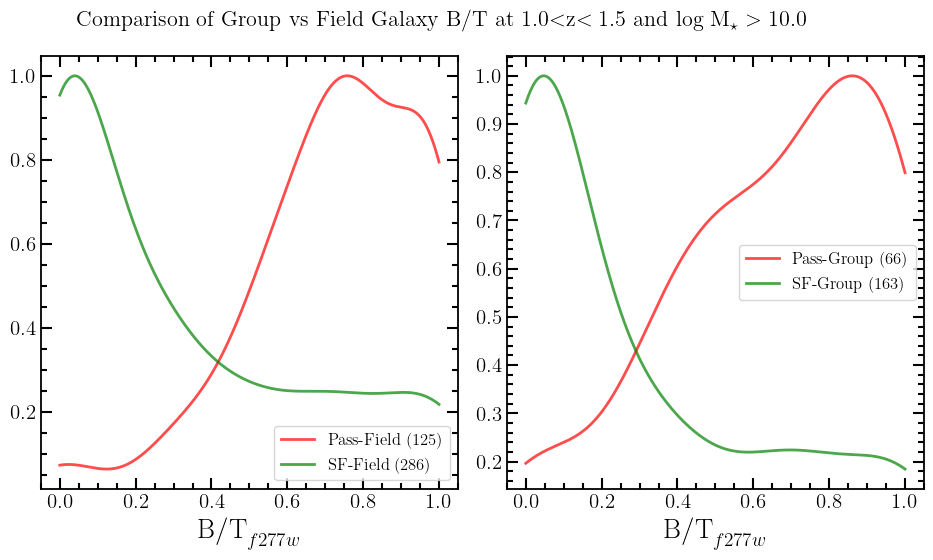

/tmp/ipykernel_559780/3218514759.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_559780/3218514759.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 1.5 < z < 2.0 ---
Number of galaxies in field_gal_bin: 501
Number of galaxies in group_gal_bin: 225
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_559780/3218514759.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_559780/3218514759.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_559780/3218514759.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_559780/3218514759.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.

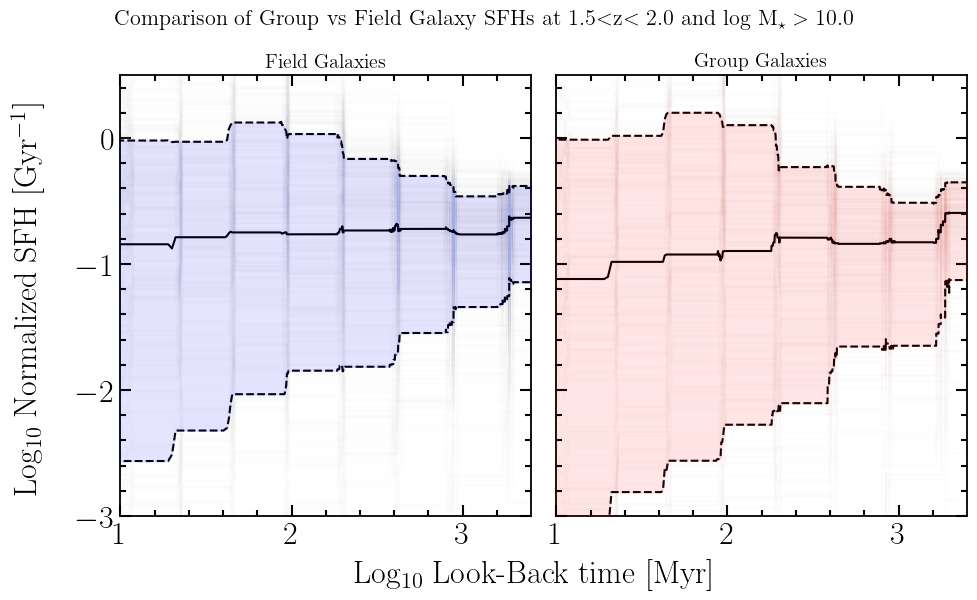

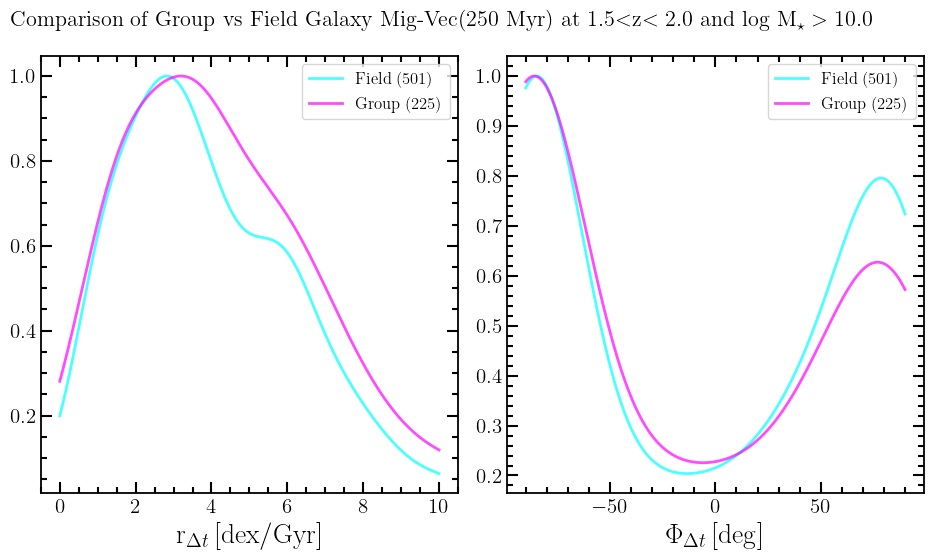

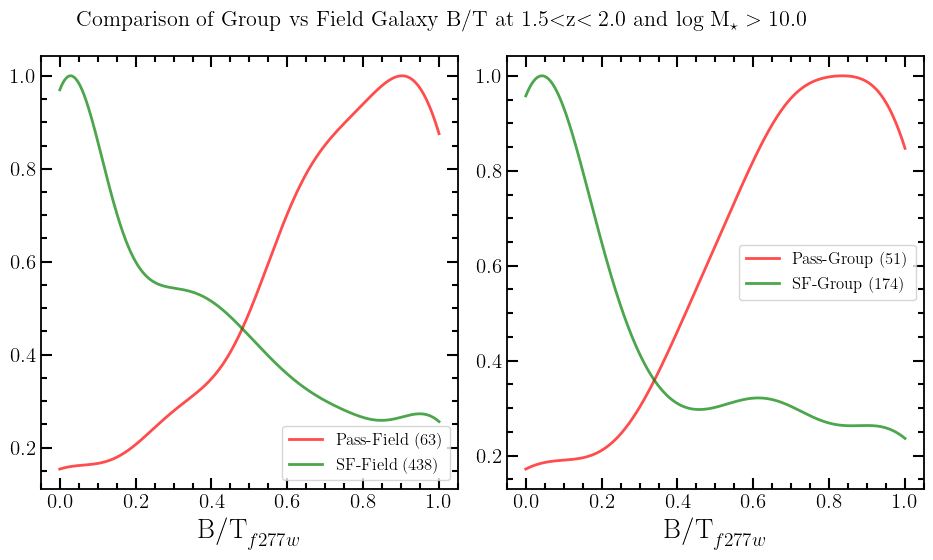

/tmp/ipykernel_559780/3218514759.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_559780/3218514759.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 2.0 < z < 2.5 ---
Number of galaxies in field_gal_bin: 351
Number of galaxies in group_gal_bin: 155
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_559780/3218514759.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_559780/3218514759.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_559780/3218514759.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_559780/3218514759.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.

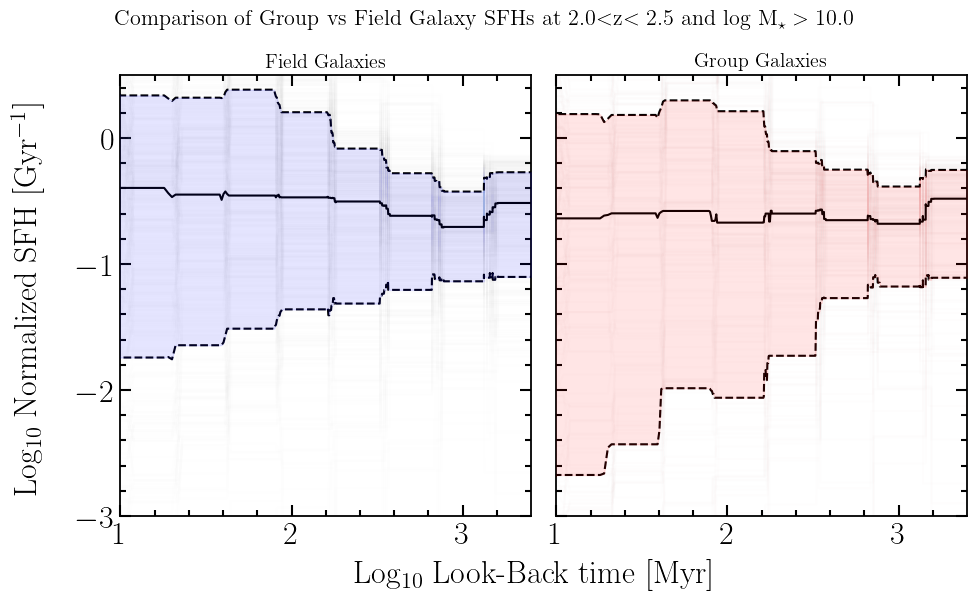

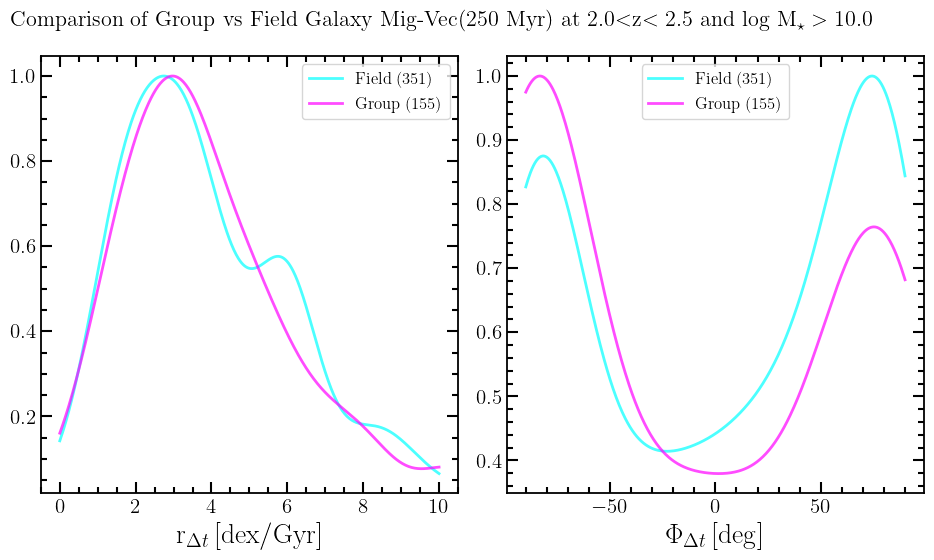

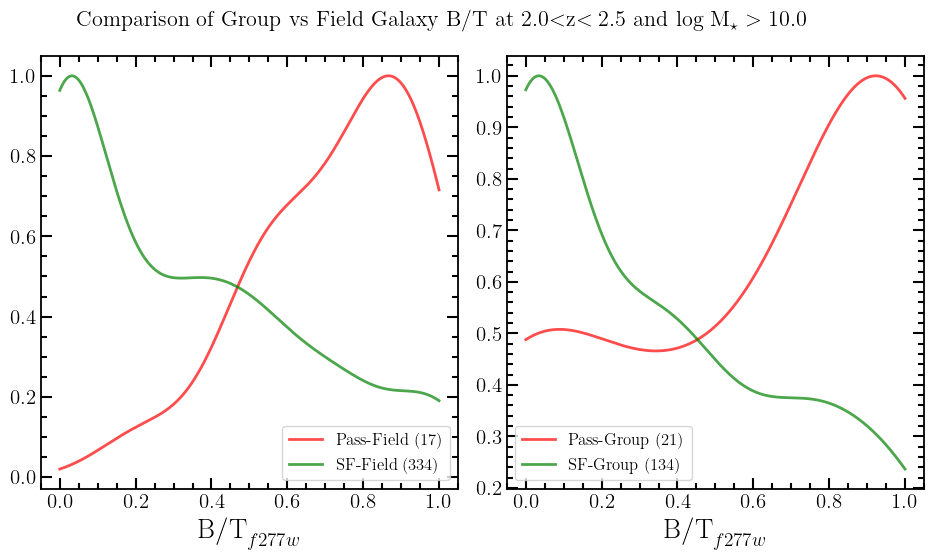

/tmp/ipykernel_559780/3218514759.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_559780/3218514759.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 2.5 < z < 3.0 ---
Number of galaxies in field_gal_bin: 139
Number of galaxies in group_gal_bin: 74
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_559780/3218514759.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_559780/3218514759.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_559780/3218514759.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_559780/3218514759.py:299: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:300: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")
/tmp/ipykernel_559780/3218514759.py:336: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(time),np.

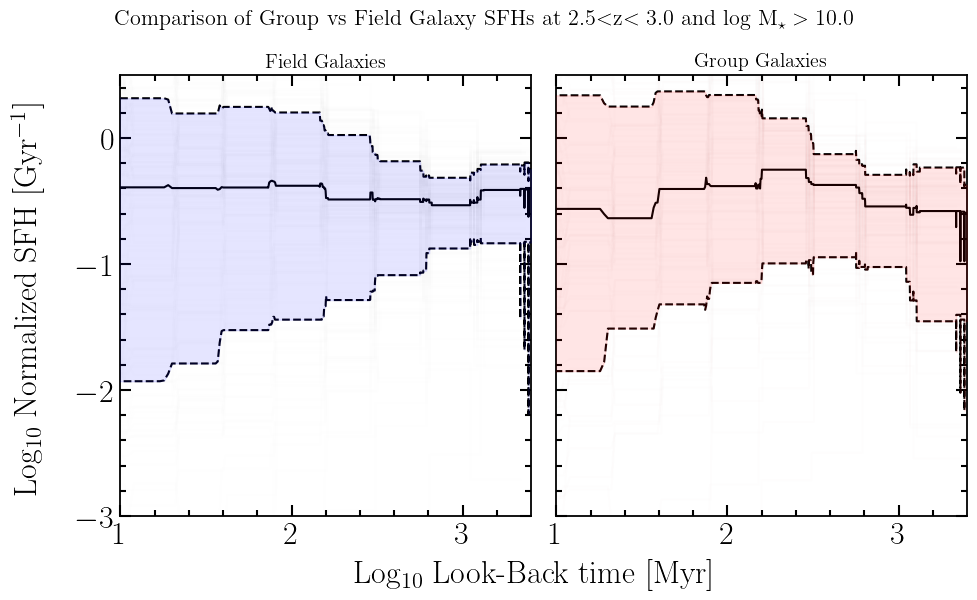

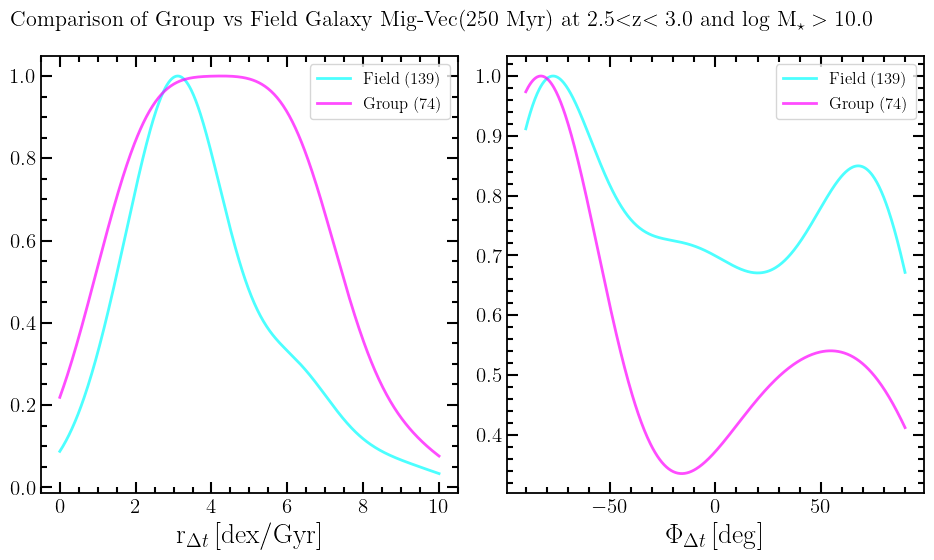

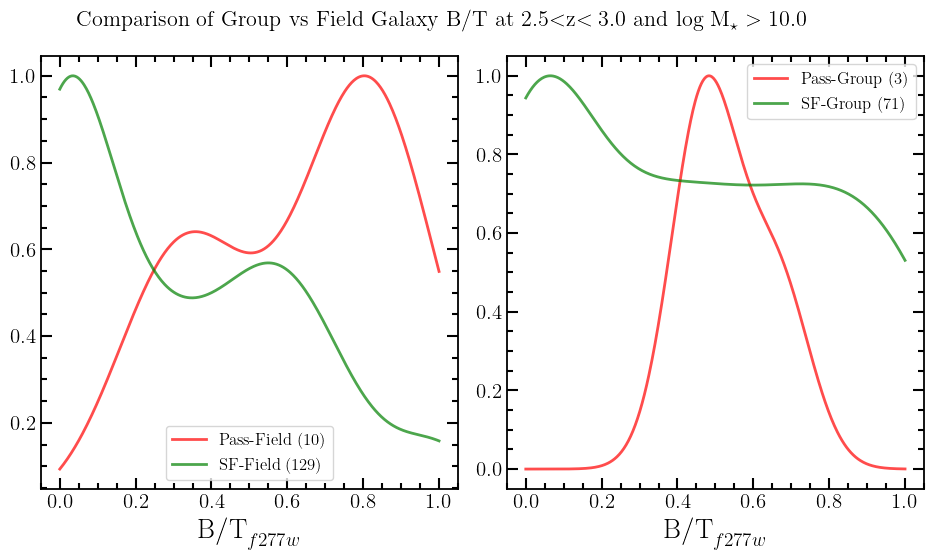

/tmp/ipykernel_559780/3218514759.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)
/tmp/ipykernel_559780/3218514759.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)



--- Analyzing Redshift Bin: 3.0 < z < 3.7 ---
Number of galaxies in field_gal_bin: 223
Number of galaxies in group_gal_bin: 85
Number of common galaxies (by 'id') in both bins: 0
Percentage of field_gal_bin also in group_gal_bin: 0.00%
Percentage of group_gal_bin also in field_gal_bin: 0.00%


/tmp/ipykernel_559780/3218514759.py:279: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
/tmp/ipykernel_559780/3218514759.py:287: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/tmp/ipykernel_559780/3218514759.py:287: RuntimeWarning: All-NaN slice encountered
  axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
/home/arango/miniconda3/envs/cigale/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/tmp/ipykernel_559780/3218514759.py:298: RuntimeWarning: divide by zero encountered in log10
  axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
/tmp/ipykernel_559780/3218514759.py:299: RuntimeWarning: divide by 

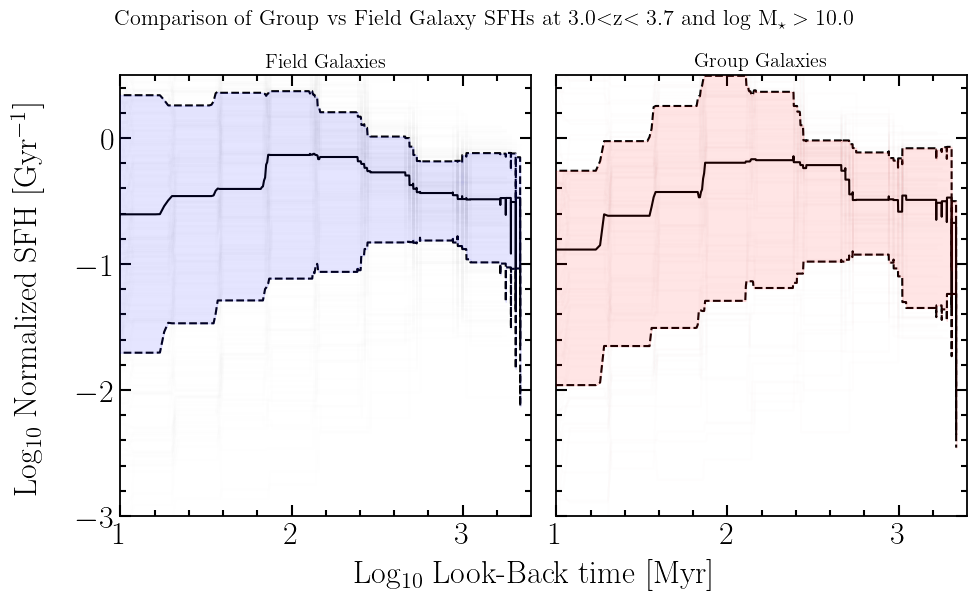

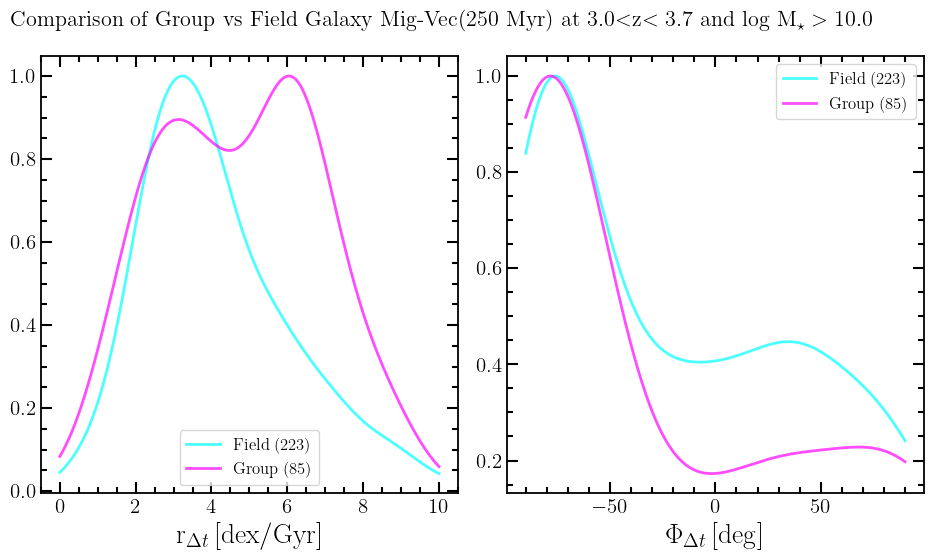

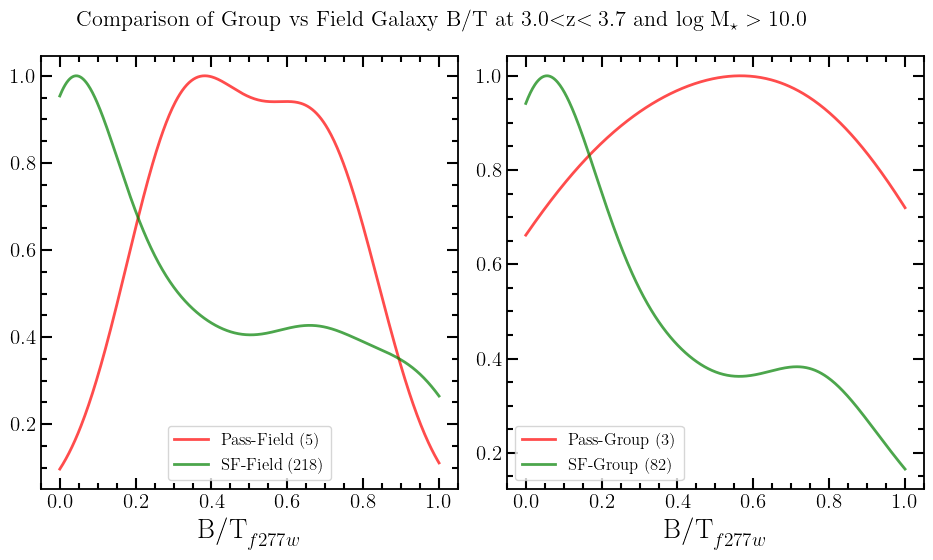

In [6]:

for min_redshift_value,max_redshift_value in [[0,0.5],[0.5,1],[1,1.5],[1.5,2],[2,2.5],[2.5,3],[3,3.7]]:    # Define the two given redshift values
    
    # Filter field_gal based on the 'best.universe.redshift' column
    # and reassign to field_gal as the request implies filtering "on the pandas df named field_gal"
    log_m_lim=10
    cond_z_phot_field=(np.log10(cigale_field_gal['mass']) > log_m_lim) & (lephare_field_gal['zfinal'] >= min_redshift_value) & (lephare_field_gal['zfinal'] <= max_redshift_value)

    
    cigale_field_gal_bin = cigale_field_gal[cond_z_phot_field]
    lepahre_field_gal_bin = lephare_field_gal[cond_z_phot_field]
    BD_field_gal_bin = BD_field_gal[cond_z_phot_field]
    sSFR_cigale_field_bin=np.log10(cigale_field_gal_bin['sfr_100myr']/cigale_field_gal_bin['mass'])
    cond_passive_field_bin=sSFR_cigale_field_bin<=-11

    cond_z_phot_group=(np.log10(cigale_group_gal['mass']) > log_m_lim) & (lephare_group_gal['zfinal'] >= min_redshift_value) & (lephare_group_gal['zfinal'] <= max_redshift_value)
    
    cigale_group_gal_bin = cigale_group_gal[cond_z_phot_group]
    lepahre_group_gal_bin = lephare_group_gal[cond_z_phot_group]
    BD_group_gal_bin = BD_group_gal[cond_z_phot_group]
    sSFR_cigale_group_bin=np.log10(cigale_group_gal_bin['sfr_100myr']/cigale_group_gal_bin['mass'])
    cond_passive_group_bin=sSFR_cigale_group_bin<=-11
    
    def interpolate_sfh(t_original, sfr_original, t_grid_):
        f = interp1d(t_original, sfr_original, bounds_error=False, fill_value=np.nan)
        return f(t_grid_)  # will give NaN for times outside original SFH
    
    # Assuming field_gal is your DataFrame
    
    # Identify columns matching the patterns 'bayes.sfh.time_binX' and 'sfh.sfr_binX'
    # where X goes from 1 to 9
    #columns_to_check = []
    #for i in range(1, 10):
    #    col_time = f'bayes.sfh.time_bin{i}'
    #    col_sfr = f'bayes.sfh.sfr_bin{i}'
    #    if col_time in field_gal_bin.columns:
    #        columns_to_check.append(col_time)
    #    if col_sfr in field_gal_bin.columns:
    #        columns_to_check.append(col_sfr)
    
    bin_list = ['sfh_sfr_bin' + str(i) for i in range(1, 10)]  # Bins amplitudes in M_solar by yr
    bin_time_list = ['sfh_time_bin' + str(i) for i in range(1, 10)]  # bins_time_list
    

    cigale_field_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)    
    cigale_group_gal_bin.dropna(subset=bin_list+bin_time_list, inplace=True)

    print(f"\n--- Analyzing Redshift Bin: {min_redshift_value:.1f} < z < {max_redshift_value:.1f} ---")
    print(f"Number of galaxies in field_gal_bin: {len(cigale_field_gal_bin)}")
    print(f"Number of galaxies in group_gal_bin: {len(cigale_group_gal_bin)}")

    # Get unique IDs for each bin
    cigale_field_ids = set(cigale_field_gal_bin['id'].unique())
    cigale_group_ids = set(cigale_group_gal_bin['id'].unique())

        # Check for overlap
    cigale_common_ids = cigale_field_ids.intersection(cigale_group_ids)
    print(f"Number of common galaxies (by 'id') in both bins: {len(cigale_common_ids)}")
    if len(cigale_field_ids) > 0:
        print(f"Percentage of field_gal_bin also in group_gal_bin: {len(cigale_common_ids) / len(cigale_field_ids) * 100:.2f}%")
    if len(cigale_group_ids) > 0:
        print(f"Percentage of group_gal_bin also in field_gal_bin: {len(cigale_common_ids) / len(cigale_group_ids) * 100:.2f}%")

    if len(cigale_field_ids) == len(cigale_group_ids) and len(cigale_common_ids) == len(cigale_field_ids) and len(cigale_field_ids) > 0:
        print("WARNING: field_gal_bin and group_gal_bin contain the exact same set of galaxies for this redshift bin!")
    elif len(cigale_common_ids) / len(cigale_field_ids) > 0.8 or len(cigale_common_ids) / len(cigale_group_ids) > 0.8:
        print("NOTE: There is a very high overlap ( > 80%) between field_gal_bin and group_gal_bin for this redshift bin.")
   
            
    #size=400
    #idx_sample=cigale_field_gal_bin.sample(size,replace=False).index
    idx_sample=cigale_field_gal_bin.index
    
    window=5
    max_size=2511
    A = cigale_field_gal_bin[bin_list]
    B = cigale_field_gal_bin[bin_time_list]
    
    
    t_grid = np.linspace(0, max_size, max_size)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)
    fig.suptitle("Comparison of Group vs Field Galaxy SFHs at %.1f$<$z$<%.1f$ and log M$_\star>%.1f$"%(min_redshift_value,max_redshift_value,log_m_lim), fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # adjust so title fits
    axs = axs.flatten()


    fig_, axs_ = plt.subplots(1, 2, figsize=(10, 6), sharex=False, sharey=False)
    fig_.suptitle("Comparison of Group vs Field Galaxy Mig-Vec(250 Myr) at %.1f$<$z$<%.1f$ and log M$_\star>%.1f$"%(min_redshift_value,max_redshift_value,log_m_lim), fontsize=16)
    fig_.tight_layout(rect=[0, 0, 1, 0.95])  # adjust so title fits
    axs_ = axs_.flatten()


    # Calculate KDE for cigale_field_gal_bin
    x_grid_cigale_field_gal_bin = np.linspace(0, 10, 500)
    size_data=len(cigale_field_gal_bin['sfr_mass_vector_norm'].values*1E3)
    if len(cigale_field_gal_bin['sfr_mass_vector_norm'].values*1E3) > 1:
        kde_cigale_field_gal_bin = gaussian_kde(cigale_field_gal_bin['sfr_mass_vector_norm'].values*1E3)
        density_cigale_field_gal_bin = kde_cigale_field_gal_bin(x_grid_cigale_field_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_cigale_field_gal_bin.size > 0 and density_cigale_field_gal_bin.max() > 0:
        axs_[0].plot(x_grid_cigale_field_gal_bin, density_cigale_field_gal_bin / density_cigale_field_gal_bin.max(), 
                 alpha=0.7, color='cyan', label='Field (%i)'%size_data, linewidth=2)


    # Calculate KDE for cigale_group_gal_bin
    x_grid_cigale_group_gal_bin = np.linspace(0, 10, 500)
    size_data=len(cigale_group_gal_bin['sfr_mass_vector_norm'].values*1E3)
    if size_data > 1:
        kde_cigale_group_gal_bin = gaussian_kde(cigale_group_gal_bin['sfr_mass_vector_norm'].values*1E3)
        density_cigale_group_gal_bin = kde_cigale_group_gal_bin(x_grid_cigale_group_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_cigale_group_gal_bin.size > 0 and density_cigale_group_gal_bin.max() > 0:
        axs_[0].plot(x_grid_cigale_group_gal_bin, density_cigale_group_gal_bin / density_cigale_group_gal_bin.max(), 
                 alpha=0.7, color='magenta', label='Group (%i)'%size_data, linewidth=2)


    
    
    #axs_[0].hist(cigale_field_gal_bin['sfr_mass_vector_norm']*1E3,density=True,bins=np.linspace(0,10,30),alpha=0.5,color='cyan',label='Field')
    #axs_[0].hist(cigale_group_gal_bin['sfr_mass_vector_norm']*1E3,density=True,bins=np.linspace(0,10,30),alpha=0.5,color='magenta',label='Group')
    axs_[0].set_xlabel(r'$\mathrm{r}_{\Delta t} \,[\mathrm{dex/Gyr}]$')


  # Calculate KDE for cigale_field_gal_bin
    x_grid_cigale_field_gal_bin = np.linspace(-90, 90, 500)
    size_data=len(cigale_field_gal_bin['sfr_mass_vector_dir'].values)
    if size_data > 1:
        kde_cigale_field_gal_bin = gaussian_kde(cigale_field_gal_bin['sfr_mass_vector_dir'].values)
        density_cigale_field_gal_bin = kde_cigale_field_gal_bin(x_grid_cigale_field_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_cigale_field_gal_bin.size > 0 and density_cigale_field_gal_bin.max() > 0:
        axs_[1].plot(x_grid_cigale_field_gal_bin, density_cigale_field_gal_bin / density_cigale_field_gal_bin.max(), 
                 alpha=0.7, color='cyan', label='Field (%i)'%size_data, linewidth=2)


    # Calculate KDE for cigale_group_gal_bin
    x_grid_cigale_group_gal_bin = np.linspace(-90, 90, 500)
    size_data=len(cigale_group_gal_bin['sfr_mass_vector_dir'].values)
    if size_data > 1:
        kde_cigale_group_gal_bin = gaussian_kde(cigale_group_gal_bin['sfr_mass_vector_dir'].values)
        density_cigale_group_gal_bin = kde_cigale_group_gal_bin(x_grid_cigale_group_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_cigale_group_gal_bin.size > 0 and density_cigale_group_gal_bin.max() > 0:
        axs_[1].plot(x_grid_cigale_group_gal_bin, density_cigale_group_gal_bin / density_cigale_group_gal_bin.max(), 
                 alpha=0.7, color='magenta', label='Group (%i)'%size_data, linewidth=2)

    

    #axs_[1].hist(cigale_field_gal_bin['sfr_mass_vector_dir'],density=True,bins=30,alpha=0.5,color='cyan',label='Field')
    #axs_[1].hist(cigale_group_gal_bin['sfr_mass_vector_dir'],density=True,bins=30,alpha=0.5,color='magenta',label='Group')
    axs_[1].set_xlabel(r'$\Phi_{\Delta t}\,[\mathrm{deg}]$')

    fig_.tight_layout(rect=[0.05, 0.05, 1, 1])
    axs_[0].legend()
    axs_[1].legend()

    

    fig__, axs__= plt.subplots(1, 2, figsize=(10, 6), sharex=False, sharey=False)
    fig__.suptitle("Comparison of Group vs Field Galaxy B/T at %.1f$<$z$<%.1f$ and log M$_\star>%.1f$"%(min_redshift_value,max_redshift_value,log_m_lim), fontsize=16)
    fig__.tight_layout(rect=[0, 0, 1, 0.95])  # adjust so title fits
    axs__ = axs__.flatten()
    
    #bins_B_T=np.linspace(0,1,30)
    #counts_norm_field_pass, bin_edges_norm =np.histogram(BD_field_gal_bin['b/t_f277w'][cond_passive_field_bin],bins=bins_B_T)
    #counts_norm_field_SF, _ =np.histogram(BD_field_gal_bin['b/t_f277w'][~cond_passive_field_bin],bins=bins_B_T)
    #counts_norm_group_pass, _=np.histogram(BD_group_gal_bin['b/t_f277w'][cond_passive_group_bin],bins=bins_B_T)
    #counts_norm_group_SF, _=np.histogram(BD_group_gal_bin['b/t_f277w'][~cond_passive_group_bin],bins=bins_B_T)
    #max_count_norm_field_pass = max(counts_norm_field_pass)
    #max_count_norm_field_SF = max(counts_norm_field_SF)
    #max_count_norm_group_pass = max(counts_norm_group_pass)
    #max_count_norm_group_SF = max(counts_norm_group_SF)
    #axs__[0].step(bin_edges_norm[:-1], counts_norm_field_pass / max_count_norm_field_pass, where='post', alpha=0.5, color='cyan', label='Pass', linewidth=2)
    #axs__[0].step(bin_edges_norm[:-1], counts_norm_field_SF / max_count_norm_field_SF, where='post', alpha=0.5, color='magenta', label='SF', linewidth=2)
    #axs__[1].step(bin_edges_norm[:-1], counts_norm_group_pass / max_count_norm_group_pass, where='post', alpha=0.5, color='cyan', label='Pass', linewidth=2)
    #axs__[1].step(bin_edges_norm[:-1], counts_norm_group_SF / max_count_norm_group_SF, where='post', alpha=0.5, color='magenta', label='SF', linewidth=2)


    # Calculate KDE for cigale_field_gal_bin
    x_grid_BD_field_gal_bin = np.linspace(0, 1, 500)
    size_data=len(BD_field_gal_bin['b/t_f277w'].values[cond_passive_field_bin])
    if size_data > 1:
        kde_BD_field_gal_bin = gaussian_kde(BD_field_gal_bin['b/t_f277w'].values[cond_passive_field_bin])
        density_BD_field_gal_bin = kde_BD_field_gal_bin(x_grid_BD_field_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_BD_field_gal_bin.size > 0 and density_BD_field_gal_bin.max() > 0:
        axs__[0].plot(x_grid_BD_field_gal_bin, density_BD_field_gal_bin / density_BD_field_gal_bin.max(), 
                 alpha=0.7, color='red',label='Pass-Field (%i)'%size_data, linewidth=2)

    # Calculate KDE for cigale_field_gal_bin
    x_grid_BD_field_gal_bin = np.linspace(0, 1, 500)
    size_data=len(BD_field_gal_bin['b/t_f277w'].values[~cond_passive_field_bin])
    if size_data > 1:
        kde_BD_field_gal_bin = gaussian_kde(BD_field_gal_bin['b/t_f277w'].values[~cond_passive_field_bin])
        density_BD_field_gal_bin = kde_BD_field_gal_bin(x_grid_BD_field_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_BD_field_gal_bin.size > 0 and density_BD_field_gal_bin.max() > 0:
        axs__[0].plot(x_grid_BD_field_gal_bin, density_BD_field_gal_bin / density_BD_field_gal_bin.max(), 
                 alpha=0.7, color='green',label='SF-Field (%i)'%size_data, linewidth=2)


    #axs__[0].hist(BD_field_gal_bin['b/t_f277w'][cond_passive_field_bin],density=True,bins=30,alpha=0.5,color='red',label='Pass-Field')
    #axs__[0].hist(BD_field_gal_bin['b/t_f277w'][~cond_passive_field_bin],density=True,bins=30,alpha=0.5,color='green',label='SF-Field')
    axs__[0].set_xlabel(r'$\mathrm{B/T}_{f277w}$')


    # Calculate KDE for cigale_field_gal_bin
    x_grid_BD_group_gal_bin = np.linspace(0, 1, 500)
    size_data=len(BD_group_gal_bin['b/t_f277w'].values[cond_passive_group_bin])
    if len(BD_group_gal_bin['b/t_f277w'].values[cond_passive_group_bin]) > 1:
        kde_BD_group_gal_bin = gaussian_kde(BD_group_gal_bin['b/t_f277w'].values[cond_passive_group_bin])
        density_BD_group_gal_bin = kde_BD_group_gal_bin(x_grid_BD_group_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_BD_group_gal_bin.size > 0 and density_BD_group_gal_bin.max() > 0:
        axs__[1].plot(x_grid_BD_field_gal_bin, density_BD_group_gal_bin / density_BD_group_gal_bin.max(), 
                 alpha=0.7, color='red',label='Pass-Group (%i)'%size_data, linewidth=2)

    # Calculate KDE for cigale_field_gal_bin
    x_grid_BD_group_gal_bin = np.linspace(0, 1, 500)
    size_data=len(BD_group_gal_bin['b/t_f277w'].values[~cond_passive_group_bin])
    if size_data > 1:
        kde_BD_group_gal_bin = gaussian_kde(BD_group_gal_bin['b/t_f277w'].values[~cond_passive_group_bin])
        density_BD_group_gal_bin = kde_BD_group_gal_bin(x_grid_BD_group_gal_bin)

    # Normalize and Plot Passive Field KDE (normalized by its own peak)
    if density_BD_group_gal_bin.size > 0 and density_BD_group_gal_bin.max() > 0:
        axs__[1].plot(x_grid_BD_group_gal_bin, density_BD_group_gal_bin / density_BD_group_gal_bin.max(), 
                 alpha=0.7, color='green',label='SF-Group (%i)'%size_data, linewidth=2)



    #axs__[1].hist(BD_group_gal_bin['b/t_f277w'][cond_passive_group_bin],density=True,bins=30,alpha=0.5,color='red',label='Pass-Group')
    #axs__[1].hist(BD_group_gal_bin['b/t_f277w'][~cond_passive_group_bin],density=True,bins=30,alpha=0.5,color='green',label='SF-Group')
    axs__[1].set_xlabel(r'$\mathrm{B/T}_{f277w}$')

    fig__.tight_layout(rect=[0.05, 0.05, 1, 1])
    axs__[0].legend()
    axs__[1].legend()



    
    
    def rolling_window(a, window):
        pad = np.ones(len(a.shape), dtype=np.int32)
        pad[-1] = window - 1
        pad = list(zip(pad, np.zeros(len(a.shape), dtype=np.int32)))
        a = np.pad(a, pad, mode='reflect')
        shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
        strides = a.strides + (a.strides[-1],)
        return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
    
    sfr_mean_field=np.zeros((len(idx_sample),max_size))
    k=0
    for m in idx_sample:
        amplitudes = A.loc[m].values
        bins = np.append(0, B.loc[m].values).astype(int)
        sfr = np.zeros(bins[-1])
        time = np.linspace(0, bins[-1], bins[-1]).astype(int)
    
                
        for n in range(len(bins) - 1):
            time_bin = np.where((time >= bins[n]) & (time <= bins[n + 1] - 1))
            sfr[time_bin] = amplitudes[n]
        
    
        
        sfr_mean_field[k]=interpolate_sfh(time,sfr,t_grid)
    
        #sfr_mean[k]=np.mean(rolling_window(sfr[:max_size],window),axis=1)
        #sfr_var += sfr[:500] ** 2
        axs[0].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#B0C4DE')
        k+=1
    
        
    #sfr_mean=np.median(sfr_mean,axis=0)
    #sfr_std = np.sqrt(sfr_var / len(idx_sample) - sfr_mean ** 2)
    
    axs[0].set_title("Field Galaxies")
    axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field, axis=0))+9,c='k')
    #axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field[cond_passive_field_bin], axis=0))+9,c='k')
    #axs[0].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_field[~cond_passive_field_bin], axis=0))+9,c='k')
    axs[0].set_xlim(np.log10(10), np.log10(max_size))
    axs[0].set_ylim(-3.2, 1)
    
    
    p16 = np.nanpercentile(np.log10(sfr_mean_field)+9, 16, axis=0)
    p50 = np.nanpercentile(np.log10(sfr_mean_field)+9, 50, axis=0)  # median
    p84 = np.nanpercentile(np.log10(sfr_mean_field)+9, 84, axis=0)
    
    axs[0].fill_between(np.log10(t_grid), p16, p84, color='blue', alpha=0.1, label='16–84th percentile',zorder=10)
    axs[0].plot(np.log10(t_grid),p16,c='k',ls="--")
    axs[0].plot(np.log10(t_grid),p84,c='k',ls="--")

    
    #axs[0].set_xlabel('Log$_{10}$Look-Back time [Myr]')
    #axs[0].set_ylabel('Log$_{10}$ Normalized SFH [Gyr$^{-1}$]')
    
    
    
    #idx_sample=cigale_group_gal_bin.sample(size,replace=False).index
    idx_sample=cigale_group_gal_bin.index
    
    
    A = cigale_group_gal_bin[bin_list]
    
    B = cigale_group_gal_bin[bin_time_list]
    
    sfr_mean_group=np.zeros((len(idx_sample),max_size))
    
    k=0
    for m in idx_sample:
        amplitudes = A.loc[m].values
        bins = np.append(0, B.loc[m].values).astype(int)
        sfr = np.zeros(bins[-1])
        time = np.linspace(0, bins[-1], bins[-1]).astype(int)
    
                
        for n in range(len(bins) - 1):
            time_bin = np.where((time >= bins[n]) & (time <= bins[n + 1] - 1))
            sfr[time_bin] = amplitudes[n]
        
    
        
        sfr_mean_group[k]=interpolate_sfh(time,sfr,t_grid)
    
        #sfr_mean[k]=np.mean(rolling_window(sfr[:max_size],window),axis=1)
        #sfr_var += sfr[:500] ** 2
        axs[1].plot(np.log10(time),np.log10(np.median(rolling_window(sfr,window),axis=1))+9,alpha=0.01,c='#F08080')
        k+=1
    
        
    #sfr_mean=np.median(sfr_mean,axis=0)
    #sfr_std = np.sqrt(sfr_var / len(idx_sample) - sfr_mean ** 2)
    
    axs[1].set_title("Group Galaxies")
    axs[1].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_group, axis=0))+9,c='k')
    #axs[1].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_group[cond_passive_group_bin], axis=0))+9,c='k')
    #axs[1].plot(np.log10(t_grid),np.log10(np.nanmedian(sfr_mean_group[~cond_passive_group_bin], axis=0))+9,c='k')
    axs[1].set_xlim(np.log10(10), np.log10(max_size))
    #axs[1].set_ylim(-3.2, 1)
    axs[1].set_ylim(-3, 0.5)
    
    
    
    p16 = np.nanpercentile(np.log10(sfr_mean_group)+9, 16, axis=0)
    p50 = np.nanpercentile(np.log10(sfr_mean_group)+9, 50, axis=0)  # median
    p84 = np.nanpercentile(np.log10(sfr_mean_group)+9, 84, axis=0)
    
    axs[1].fill_between(np.log10(t_grid), p16, p84, color='red', alpha=0.1, label='16–84th percentile',zorder=10)
    axs[1].plot(np.log10(t_grid),p16,c='k',ls="--")
    axs[1].plot(np.log10(t_grid),p84,c='k',ls="--")
    
    #axs[1].set_xlabel('Log$_{10}$Look-Back time [Myr]')
    #axs[1].set_ylabel('Log$_{10}$ Normalized SFH [Gyr$^{-1}$]')
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=23)  # Adjust the label size as needed
        ax.tick_params(axis='both', which='minor', labelsize=23)  # Adjust for minor ticks if needed
    
    
    fig.text(0.55, 0.025, 'Log$_{10}$ Look-Back time [Myr]', ha='center', fontsize=23)
    fig.text(0.025, 0.5, 'Log$_{10}$ Normalized SFH [Gyr$^{-1}$]', va='center', rotation='vertical', fontsize=23)
    fig.tight_layout(rect=[0.05, 0.05, 1, 1])

    plt.show()



    


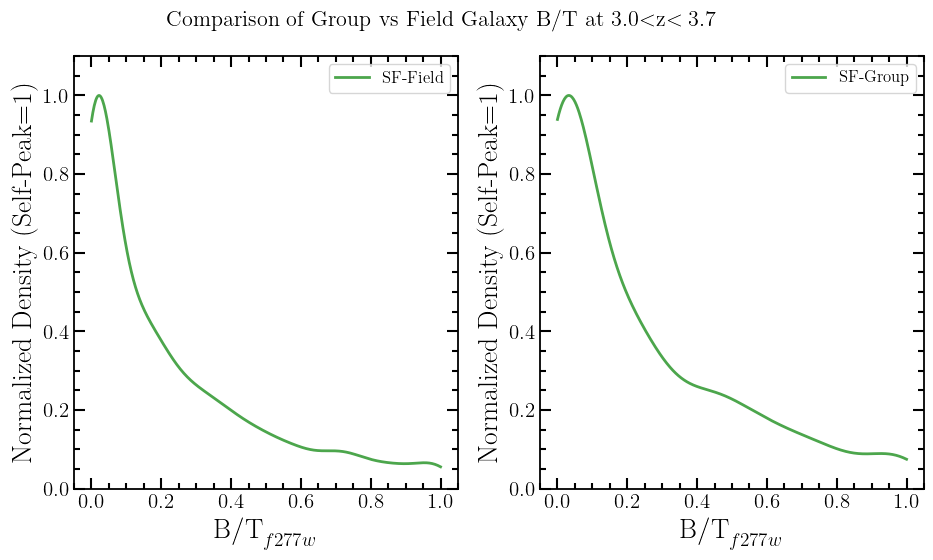

In [14]:
from scipy.stats import gaussian_kde
# Make sure you have these imports at the top of your notebook:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from scipy.stats import gaussian_kde # This is crucial for KDE

# Assuming 'min_redshift_value', 'max_redshift_value', 'BD_field_gal_bin',
# 'cond_passive_field_bin', 'BD_group_gal_bin', 'cond_passive_group_bin'
# are already defined in your notebook scope.

# --- MODIFIED CODE FOR B/T RATIO KDEs (fig__, axs__) ---
fig__, axs__= plt.subplots(1, 2, figsize=(10, 6), sharex=False, sharey=False)
fig__.suptitle("Comparison of Group vs Field Galaxy B/T at %.1f$<$z$<%.1f$"%(min_redshift_value,max_redshift_value), fontsize=16)
fig__.tight_layout(rect=[0, 0, 1, 0.95])
axs__ = axs__.flatten()

# Define common x-grid for B/T ratios, typically from 0 to 1
x_grid_bt = np.linspace(0, 1, 500) # 500 points for a smooth curve

# --- axs__[0]: Field Galaxies B/T --- 

# Data for Field Galaxies B/T (cleaned for NaNs)
data_passive_field_bt_clean = BD_field_gal_bin['b/t_f277w'][cond_passive_field_bin].dropna()
data_sf_field_bt_clean = BD_field_gal_bin['b/t_f277w'][~cond_passive_field_bin].dropna()

density_passive_field_bt = np.array([])
density_sf_field_bt = np.array([])

# Calculate KDE for Passive Field galaxies
if len(data_passive_field_bt_clean) > 1: # gaussian_kde requires at least 2 data points
    kde_passive_field_bt = gaussian_kde(data_passive_field_bt_clean)
    density_passive_field_bt = kde_passive_field_bt(x_grid_bt)

# Calculate KDE for Star-Forming Field galaxies
if len(data_sf_field_bt_clean) > 1:
    kde_sf_field_bt = gaussian_kde(data_sf_field_bt_clean)
    density_sf_field_bt = kde_sf_field_bt(x_grid_bt)

# Normalize and Plot Passive Field KDE (normalized by its own peak)
if density_passive_field_bt.size > 0 and density_passive_field_bt.max() > 0:
    axs__[0].plot(x_grid_bt, density_passive_field_bt / density_passive_field_bt.max(), 
                 alpha=0.7, color='red', label='Pass-Field', linewidth=2)

# Normalize and Plot Star-Forming Field KDE (normalized by its own peak)
if density_sf_field_bt.size > 0 and density_sf_field_bt.max() > 0:
    axs__[0].plot(x_grid_bt, density_sf_field_bt / density_sf_field_bt.max(), 
                 alpha=0.7, color='green', label='SF-Field', linewidth=2)

axs__[0].set_xlabel(r'$\mathrm{B/T}_{f277w}$')
axs__[0].set_ylabel('Normalized Density (Self-Peak=1)') # Clear ylabel for this normalization
axs__[0].set_ylim(0, 1.1) # Ensures the peak at 1 is visible and not cut off
axs__[0].legend()


# --- axs__[1]: Group Galaxies B/T --- 

# Data for Group Galaxies B/T (cleaned for NaNs)
data_passive_group_bt_clean = BD_group_gal_bin['b/t_f277w'][cond_passive_group_bin].dropna()
data_sf_group_bt_clean = BD_group_gal_bin['b/t_f277w'][~cond_passive_group_bin].dropna()

density_passive_group_bt = np.array([])
density_sf_group_bt = np.array([])

# Calculate KDE for Passive Group galaxies
if len(data_passive_group_bt_clean) > 1:
    kde_passive_group_bt = gaussian_kde(data_passive_group_bt_clean)
    density_passive_group_bt = kde_passive_group_bt(x_grid_bt)

# Calculate KDE for Star-Forming Group galaxies
if len(data_sf_group_bt_clean) > 1:
    kde_sf_group_bt = gaussian_kde(data_sf_group_bt_clean)
    density_sf_group_bt = kde_sf_group_bt(x_grid_bt)

# Normalize and Plot Passive Group KDE (normalized by its own peak)
if density_passive_group_bt.size > 0 and density_passive_group_bt.max() > 0:
    axs__[1].plot(x_grid_bt, density_passive_group_bt / density_passive_group_bt.max(), 
                 alpha=0.7, color='red', label='Pass-Group', linewidth=2)

# Normalize and Plot Star-Forming Group KDE (normalized by its own peak)
if density_sf_group_bt.size > 0 and density_sf_group_bt.max() > 0:
    axs__[1].plot(x_grid_bt, density_sf_group_bt / density_sf_group_bt.max(), 
                 alpha=0.7, color='green', label='SF-Group', linewidth=2)

axs__[1].set_xlabel(r'$\mathrm{B/T}_{f277w}$')
axs__[1].set_ylabel('Normalized Density (Self-Peak=1)') # Clear ylabel for this normalization
axs__[1].set_ylim(0, 1.1) # Set y-limit to clearly show normalization to 1
axs__[1].legend()

fig__.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show() # Make sure to show the plot!